<a href="https://colab.research.google.com/github/Ashwin1999/COVID-19-Data-Mining/blob/master/MLDM_Casestudy_Group3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COVID-19 Data Analysis - A Machine Learning Case Study

**Team**

1.   Aaradhana J. (17308)
2.   Arnab Datta (17309)
3.   Ashwin Bala (17310)
4.   Niveth Saran V J (17337)


**Objective**

1. Predict the number of COVID cases using TimeSeries Dataset
2. Use 2 different algorithms for prediction to get more insights.

**Contents of this notebook**

Under every individual roll number, we have
1. Preprocessing and EDA
2. Model training and prediction
3. Testing and Comparison

After inidvidual analysis, we also provide comparison and conclusion of our analysis.



# Importing Required Libraries

In [1]:
## General Libraries
import numpy as np # linear algebra
import warnings
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import datetime
from tqdm import tqdm
import matplotlib
import seaborn as sns
import statsmodels.api as sm
from math import sqrt

## Preprocessing
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.stattools import adfuller
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

## Keras Models
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')



matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# CB.EN.U4CSE17308


## PART-1: Exploratory Data Analysis

In [ ]:
files = [
         'https://raw.githubusercontent.com/Ashwin1999/COVID-19-Data-Mining/master/COVID-Time%20Series%20Data/time_series_covid_19_confirmed.csv',
         'https://raw.githubusercontent.com/Ashwin1999/COVID-19-Data-Mining/master/COVID-Time%20Series%20Data/time_series_covid_19_confirmed_US.csv',
         'https://raw.githubusercontent.com/Ashwin1999/COVID-19-Data-Mining/master/COVID-Time%20Series%20Data/time_series_covid_19_deaths.csv',
         'https://raw.githubusercontent.com/Ashwin1999/COVID-19-Data-Mining/master/COVID-Time%20Series%20Data/time_series_covid_19_deaths_US.csv',
         'https://raw.githubusercontent.com/Ashwin1999/COVID-19-Data-Mining/master/COVID-Time%20Series%20Data/time_series_covid_19_recovered.csv',
]

In [ ]:
df = pd.read_csv(files[0])
confirmed = df.melt(['Province/State', 'Country/Region'], df.columns[4:], var_name='Dates', value_name='Count')
confirmed.Dates = pd.to_datetime(confirmed.Dates)
confirmed.head()

,Province/State,Country/Region,Dates,Count
0,NaN,Afghanistan,2020-01-22,0
1,NaN,Albania,2020-01-22,0
2,NaN,Algeria,2020-01-22,0
3,NaN,Andorra,2020-01-22,0
4,NaN,Angola,2020-01-22,0


In [ ]:
df = pd.read_csv(files[1])
confirmed_US = df.melt(['Province_State', 'Country_Region'], df.columns[11:], var_name='Dates', value_name='Count')
confirmed_US.rename(columns={"Province_State": "Province/State", "Country_Region": "Country/Region"}, inplace=True)
confirmed_US.Dates = pd.to_datetime(confirmed_US.Dates)
confirmed_US.head()

,Province/State,Country/Region,Dates,Count
0,Alabama,US,2020-01-22,0
1,Alabama,US,2020-01-22,0
2,Alabama,US,2020-01-22,0
3,Alabama,US,2020-01-22,0
4,Alabama,US,2020-01-22,0


In [ ]:
df = pd.read_csv(files[2])
deaths = df.melt(['Province/State', 'Country/Region'], df.columns[4:], var_name='Dates', value_name='Count')
deaths.Dates = pd.to_datetime(deaths.Dates)
deaths.head()

,Province/State,Country/Region,Dates,Count
0,NaN,Afghanistan,2020-01-22,0
1,NaN,Albania,2020-01-22,0
2,NaN,Algeria,2020-01-22,0
3,NaN,Andorra,2020-01-22,0
4,NaN,Angola,2020-01-22,0


In [ ]:
df = pd.read_csv(files[3])
deaths_US = df.melt(['Province_State', 'Country_Region'], df.columns[12:], var_name='Dates', value_name='Count')
deaths_US.rename(columns={"Province_State": "Province/State", "Country_Region": "Country/Region"}, inplace=True)
deaths_US.Dates = pd.to_datetime(deaths_US.Dates)
deaths_US.head()

,Province/State,Country/Region,Dates,Count
0,Alabama,US,2020-01-22,0
1,Alabama,US,2020-01-22,0
2,Alabama,US,2020-01-22,0
3,Alabama,US,2020-01-22,0
4,Alabama,US,2020-01-22,0


In [ ]:
df = pd.read_csv(files[4])
recovered = df.melt(['Province/State', 'Country/Region'], df.columns[4:], var_name='Dates', value_name='Count')
recovered.Dates = pd.to_datetime(recovered.Dates)
recovered.head()

,Province/State,Country/Region,Dates,Count
0,NaN,Afghanistan,2020-01-22,0
1,NaN,Albania,2020-01-22,0
2,NaN,Algeria,2020-01-22,0
3,NaN,Andorra,2020-01-22,0
4,NaN,Angola,2020-01-22,0


In [ ]:
df1 = confirmed.groupby('Dates').sum().reset_index()
df2 = deaths.groupby('Dates').sum().reset_index()
df3 = recovered.groupby('Dates').sum().reset_index()

cdr = pd.DataFrame({
    'date': df1.Dates,
    'confirmed': df1.Count,
    'deaths': df2.Count,
    'recovered': df3.Count,
})

cdr.head()

,date,confirmed,deaths,recovered
0,2020-01-22,555,17,28
1,2020-01-23,654,18,30
2,2020-01-24,941,26,36
3,2020-01-25,1434,42,39
4,2020-01-26,2118,56,52


In [ ]:
cdr = cdr.melt('date', cdr.columns[1:], var_name='condition', value_name='count')
cdr.head()

,date,condition,count
0,2020-01-22,confirmed,555
1,2020-01-23,confirmed,654
2,2020-01-24,confirmed,941
3,2020-01-25,confirmed,1434
4,2020-01-26,confirmed,2118


In [ ]:
countrywise_confirmed = confirmed.groupby(['Country/Region']).sum().reset_index()
countrywise_deaths = deaths.groupby(['Country/Region']).sum().reset_index()
countrywise_recovered = recovered.groupby(['Country/Region']).sum().reset_index()

countrywise_cdr = pd.DataFrame({
    'country': countrywise_confirmed['Country/Region'],
    'confirmed': countrywise_confirmed.Count,
    'deaths': countrywise_deaths.Count,
    'recovered': countrywise_recovered.Count,
})

countrywise_cdr.head()

,country,confirmed,deaths,recovered
0,Afghanistan,3745342,114595,2139148
1,Albania,583139,17360,329905
2,Algeria,3088876,145505,2089806
3,Andorra,145841,7952,111054
4,Angola,125569,5483,45985


In [ ]:
temp1 = countrywise_cdr.sort_values('confirmed', ascending=False).head(20)
temp2 = countrywise_cdr.sort_values('deaths', ascending=False).head(20)
temp3 = countrywise_cdr.sort_values('recovered', ascending=False).head(20)


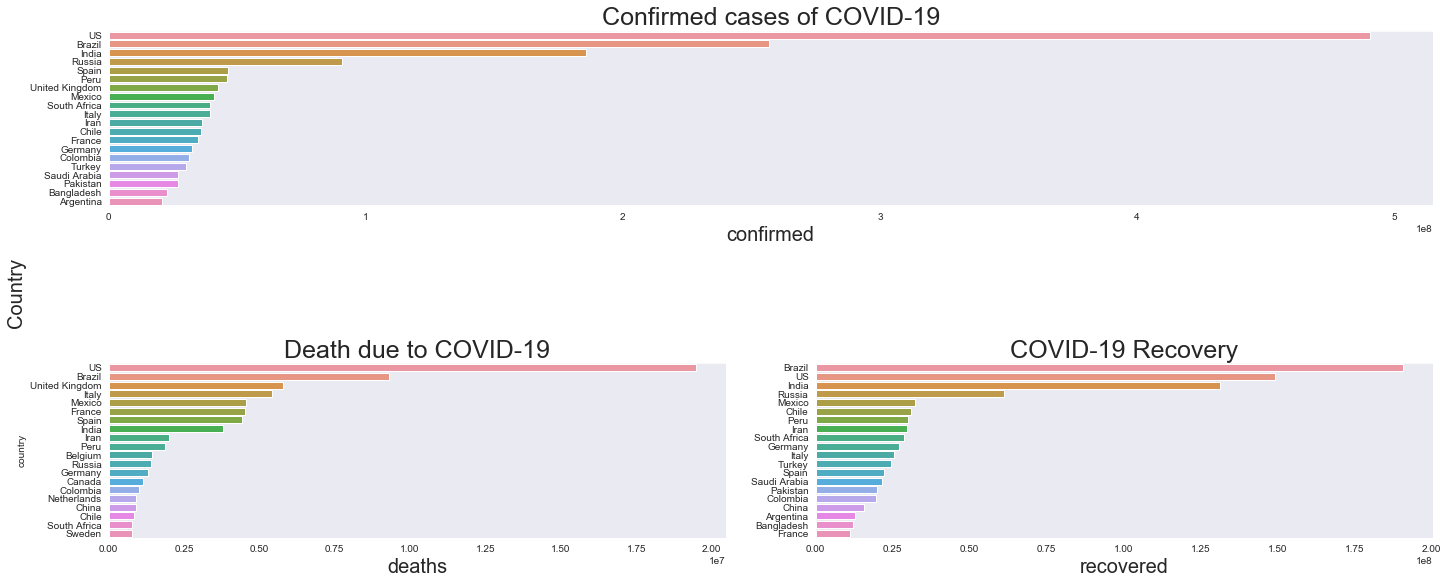

In [ ]:
fig3 = plt.figure(constrained_layout=True, figsize=(20,8));
gs = fig3.add_gridspec(2, 2);

f3_ax1 = fig3.add_subplot(gs[0, :]);
f3_ax1.set_title('Confirmed cases of COVID-19',fontsize=25);
f3_ax1.set_xlabel("Number of people recovered",fontsize=20);
sns.barplot(temp1["confirmed"], temp1["country"],ax=f3_ax1);

f3_ax2 = fig3.add_subplot(gs[1, :1]);
f3_ax2.set_title('Death due to COVID-19',fontsize=25);
f3_ax2.set_xlabel("Number of people recovered",fontsize=20);
sns.barplot(temp2["deaths"], temp2["country"],ax=f3_ax2);

f3_ax2 = fig3.add_subplot(gs[1, 1:]);
f3_ax2.set_title('COVID-19 Recovery',fontsize=25);
f3_ax2.set_xlabel("Number of people recovered",fontsize=20);
sns.barplot(temp3["recovered"], temp3["country"],ax=f3_ax2);


f3_ax1.set_ylabel("Country",fontsize=20, position=(0,-0.5));
f3_ax2.set_ylabel(" ",fontsize=0);
f3_ax2.set_ylabel(" ",fontsize=0);

## Correlation between new cases,deaths and recoveries

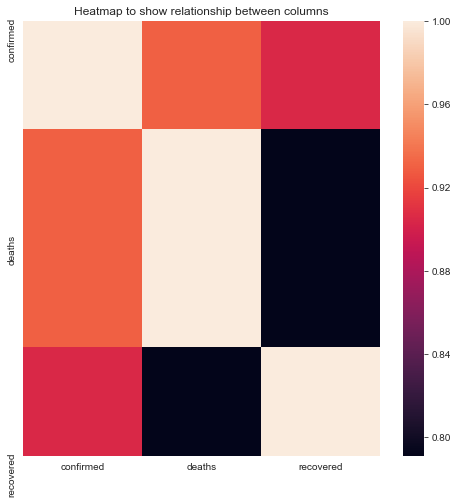

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(countrywise_cdr.corr(), cbar=True)
plt.title('Heatmap to show relationship between columns')
plt.show()

Correlation map shows that confirmed cases are positively correlated with the death cases,whereas the a similar correlation is present with the confirmed cases and the recovered cases as well

## PART-2: Building the ARIMA model for forecasting the timeseries

## Loading the data

In [ ]:
files = {
         'confirmed': 'https://raw.githubusercontent.com/Ashwin1999/COVID-19-Data-Mining/master/COVID-Time%20Series%20Data/time_series_covid_19_confirmed.csv',
         'deaths': 'https://raw.githubusercontent.com/Ashwin1999/COVID-19-Data-Mining/master/COVID-Time%20Series%20Data/time_series_covid_19_deaths.csv',
         'recovered':'https://raw.githubusercontent.com/Ashwin1999/COVID-19-Data-Mining/master/COVID-Time%20Series%20Data/time_series_covid_19_recovered.csv'
}

In [ ]:
confirmed = pd.read_csv(files['confirmed'])
deaths = pd.read_csv(files['deaths'])
recovered= pd.read_csv(files['recovered'])

In [ ]:
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,38304,38324,38398,38494,38520,38544,38572,38606,38641,38716
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,9967,10102,10255,10406,10553,10704,10860,11021,11185,11353
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,45773,46071,46364,46653,46938,47216,47488,47752,48007,48254
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,1215,1215,1215,1261,1261,1301,1301,1344,1344,1344
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,2876,2935,2965,2981,3033,3092,3217,3279,3335,3388


In [ ]:
deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,1409,1409,1412,1415,1418,1420,1420,1420,1420,1420
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,306,312,316,319,321,322,324,327,330,334
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,1539,1549,1556,1562,1571,1581,1591,1599,1605,1612
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,53,53,53,53,53,53,53,53,53,53
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,115,117,117,120,124,126,130,131,132,134


In [ ]:
recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,29713,30082,30537,30557,30715,31048,31129,31154,31234,31638
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,5882,5976,6106,6186,6239,6284,6346,6443,6494,6569
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,32259,32481,32745,32985,33183,33379,33562,33723,33875,34037
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,928,928,928,934,934,938,938,943,943,943
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1167,1192,1198,1215,1215,1245,1277,1288,1289,1301


In [ ]:
confirmed_m = confirmed.melt(['Country/Region'], confirmed.columns[4:], var_name='Dates', value_name='Count')
confirmed_m.rename(columns={"Country/Region": "Country"}, inplace=True)
confirmed_m.Dates = pd.to_datetime(confirmed_m.Dates)

deaths_m =deaths.melt(['Country/Region'], confirmed.columns[4:], var_name='Dates', value_name='Count')
deaths_m.rename(columns={"Country/Region": "Country"}, inplace=True)
deaths_m.Dates = pd.to_datetime(deaths_m.Dates)

recovered_m = recovered.melt(['Country/Region'], confirmed.columns[4:], var_name='Dates', value_name='Count')
recovered_m.rename(columns={"Country/Region": "Country"}, inplace=True)
recovered_m.Dates = pd.to_datetime(recovered_m.Dates)

In [ ]:
confirmed_m.head()

,Country,Dates,Count
0,Afghanistan,2020-01-22,0
1,Albania,2020-01-22,0
2,Algeria,2020-01-22,0
3,Andorra,2020-01-22,0
4,Angola,2020-01-22,0


In [ ]:
deaths_m.head()

,Country,Dates,Count
0,Afghanistan,2020-01-22,0
1,Albania,2020-01-22,0
2,Algeria,2020-01-22,0
3,Andorra,2020-01-22,0
4,Angola,2020-01-22,0


In [ ]:
recovered_m.head()

,Country,Dates,Count
0,Afghanistan,2020-01-22,0
1,Albania,2020-01-22,0
2,Algeria,2020-01-22,0
3,Andorra,2020-01-22,0
4,Angola,2020-01-22,0


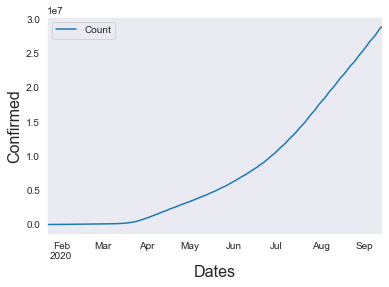

In [ ]:
confirmed_m.groupby('Dates').sum().plot();
plt.ylabel('Confirmed', fontsize=16);
plt.xlabel('Dates', fontsize=16);

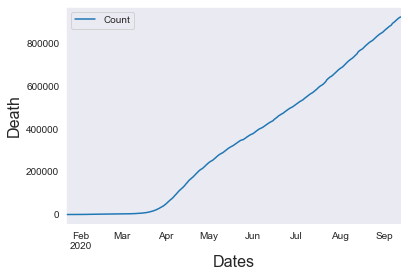

In [ ]:
deaths_m.groupby('Dates').sum().plot();
plt.ylabel('Death', fontsize=16);
plt.xlabel('Dates', fontsize=16);

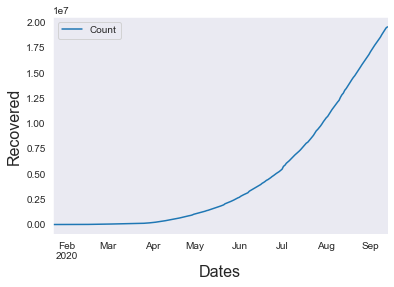

In [ ]:
recovered_m.groupby('Dates').sum().plot();
plt.ylabel('Recovered', fontsize=16);
plt.xlabel('Dates', fontsize=16);

**ETS Decomposition**

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose 

**Confirmed** 

In [ ]:
temp = confirmed_m.groupby('Dates').sum()[confirmed_m.groupby('Dates').sum()['Count']>=0]['Count']
result1 = seasonal_decompose(temp)

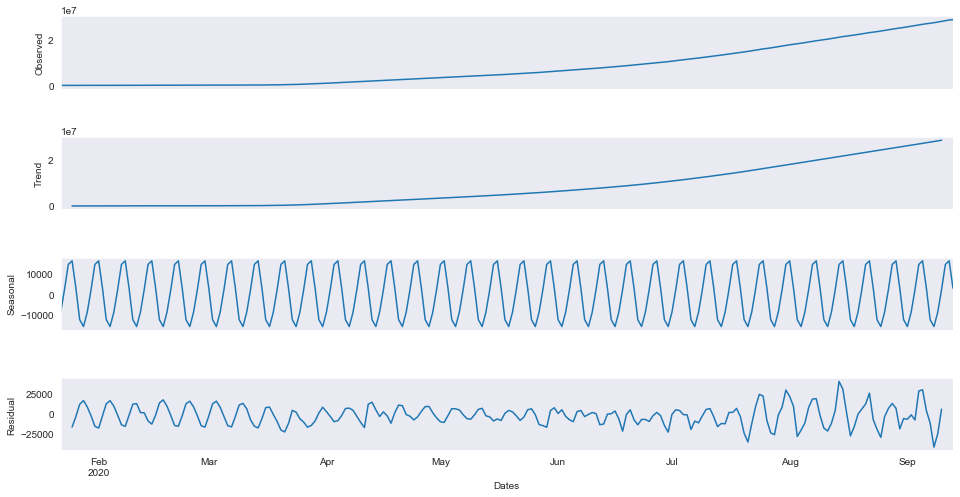

In [ ]:
fig = result1.plot()
fig.set_size_inches(15,8)

The above plot shows that an increasing trend is present,as well as that the data has seasonal components.It can also be inferred that noise exists in the data from the residual component

**Deaths**

In [ ]:
temp = deaths_m.groupby('Dates').sum()[deaths_m.groupby('Dates').sum()['Count']>=0]['Count']
result2 = seasonal_decompose(temp)

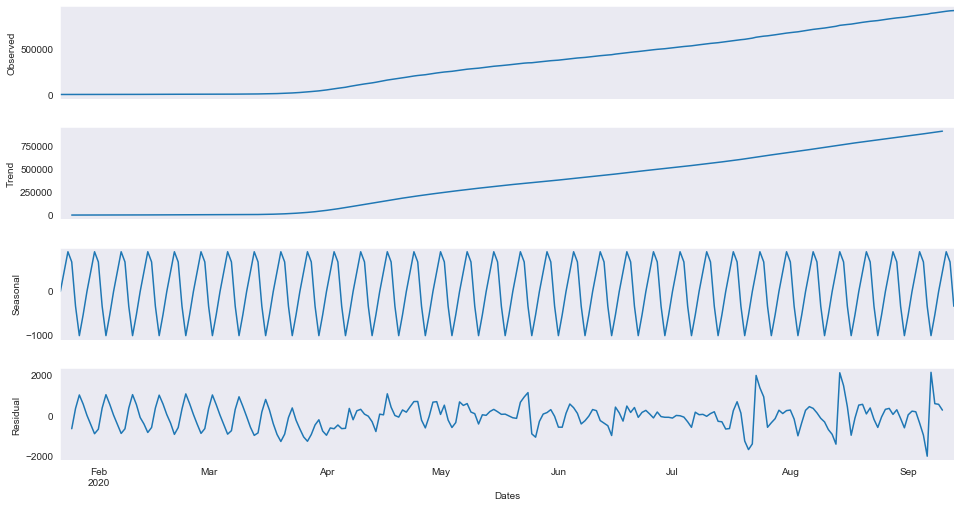

In [ ]:
fig = result2.plot()
fig.set_size_inches(15,8)

The above plot shows that an increasing trend is present,as well as that the data has seasonal components.It can also be inferred that noise exists in the data from the residual component

**Recovered data**

In [ ]:
temp = recovered_m.groupby('Dates').sum()[recovered_m.groupby('Dates').sum()['Count']>=0]['Count']
result3 = seasonal_decompose(temp)

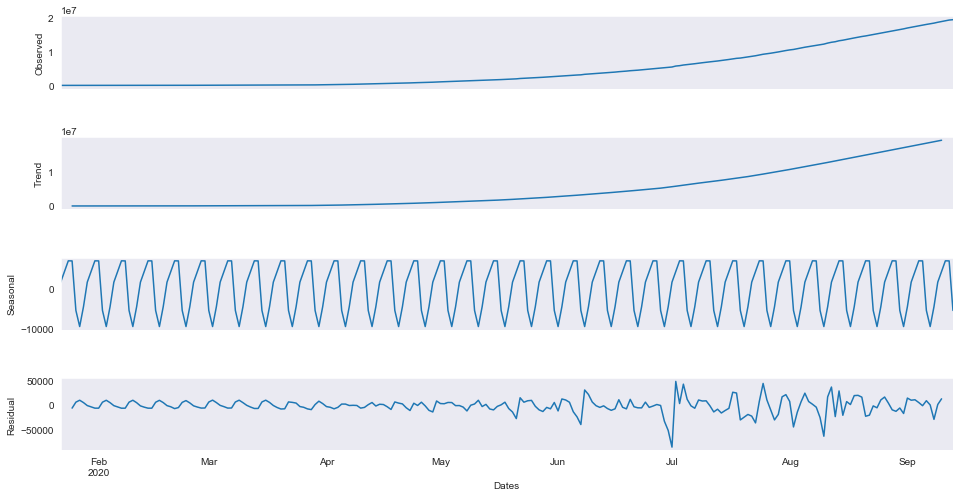

In [ ]:
fig = result3.plot()
fig.set_size_inches(15,8)

The above plot shows that an increasing trend is present,as well as that the data has seasonal components.It can also be inferred that noise exists in the data from the residual component

**Stationary test using ADF**

 The Augmented Dickey Fuller test is performed to check for the staionarity of the data.In time series predictions,having a stationary dataset is important to have correct forecasts.

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
confirmed_to_fit = confirmed_m.groupby('Dates').sum()[confirmed_m.groupby('Dates').sum()['Count']>=0]
confirmed_to_fit.head()

,Count
Dates,
2020-01-22,555
2020-01-23,654
2020-01-24,941
2020-01-25,1434
2020-01-26,2118


In [ ]:
deaths_to_fit = deaths_m.groupby('Dates').sum()[deaths_m.groupby('Dates').sum()['Count']>=0]
deaths_to_fit.head()

,Count
Dates,
2020-01-22,17
2020-01-23,18
2020-01-24,26
2020-01-25,42
2020-01-26,56


In [ ]:
recovered_to_fit = recovered_m.groupby('Dates').sum()[recovered_m.groupby('Dates').sum()['Count']>=0]
recovered_to_fit.head()

,Count
Dates,
2020-01-22,28
2020-01-23,30
2020-01-24,36
2020-01-25,39
2020-01-26,52


In [ ]:
def adf_check(time_series):

    #Pass in a time series, returns ADF report
    result = adfuller(time_series)
    
    print('Augmented Dickey-Fuller Test:')
    
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [ ]:
adf_check(confirmed_to_fit['Count'])

Augmented Dickey-Fuller Test:
ADF Test Statistic : -0.9083116511167748
p-value : 0.7852229497147831
#Lags Used : 14
Number of Observations Used : 221
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [ ]:
adf_check(deaths_to_fit['Count'])

Augmented Dickey-Fuller Test:
ADF Test Statistic : 0.03563059096803802
p-value : 0.9613813765751198
#Lags Used : 14
Number of Observations Used : 221
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [ ]:
adf_check(recovered_to_fit['Count'])

Augmented Dickey-Fuller Test:
ADF Test Statistic : -2.0608198054355604
p-value : 0.26055805862250786
#Lags Used : 8
Number of Observations Used : 227
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


According to the adf test,data is stationary,therefore differentation is to be done to make data stationary which will be done in the parameter 'd' of the SARIMAX model

**Seasonal Arima**

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
confirmed_to_fit = confirmed_m.groupby('Dates').sum()[confirmed_m.groupby('Dates').sum()['Count']>=0]

model = SARIMAX(confirmed_to_fit['Count'],order=(1,1,0), seasonal_order=(1,1,1,12))
results = model.fit()
print(results.summary())

C:\Users\indra\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                                 Statespace Model Results                                 
Dep. Variable:                              Count   No. Observations:                  236
Model:             SARIMAX(1, 1, 0)x(1, 1, 1, 12)   Log Likelihood               -2537.654
Date:                            Tue, 03 Nov 2020   AIC                           5083.308
Time:                                    02:03:52   BIC                           5096.937
Sample:                                01-22-2020   HQIC                          5088.810
                                     - 09-13-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9795      0.024     41.473      0.000       0.933       1.026
ar.S.L12      -0.2433      0.120   

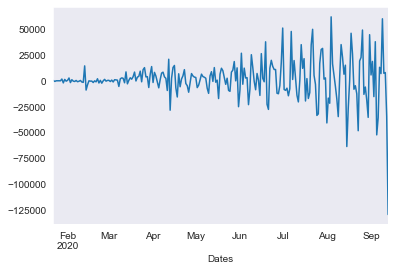

In [ ]:
results.resid.plot();

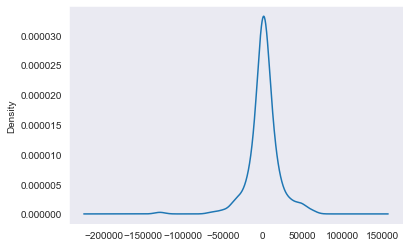

In [ ]:
results.resid.plot(kind='kde');

The residual plots seem stationary with 0 mean and uniform variance

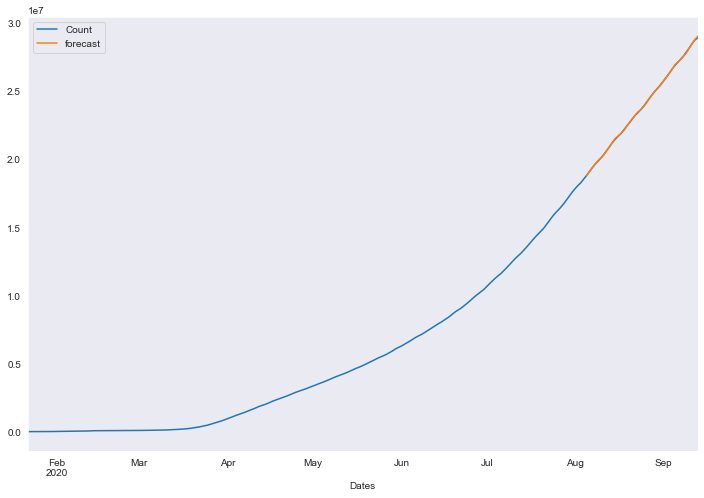

In [ ]:
confirmed_to_fit['forecast'] = results.predict(start = 196, end= 236)  
confirmed_to_fit[['Count','forecast']].plot(figsize=(12,8));

In [ ]:
from pandas.tseries.offsets import DateOffset

In [ ]:
n = 60
last_date = confirmed_to_fit.index[-1]

future_dates = [last_date+DateOffset(days=x) for x in range(1, n)]

In [ ]:
future_dates_df = pd.DataFrame(index=future_dates[1:],columns=confirmed_to_fit.columns)
future_df = pd.concat([confirmed_to_fit,future_dates_df])
future_df.tail()

,Count,forecast
2020-11-07,NaN,NaN
2020-11-08,NaN,NaN
2020-11-09,NaN,NaN
2020-11-10,NaN,NaN
2020-11-11,NaN,NaN


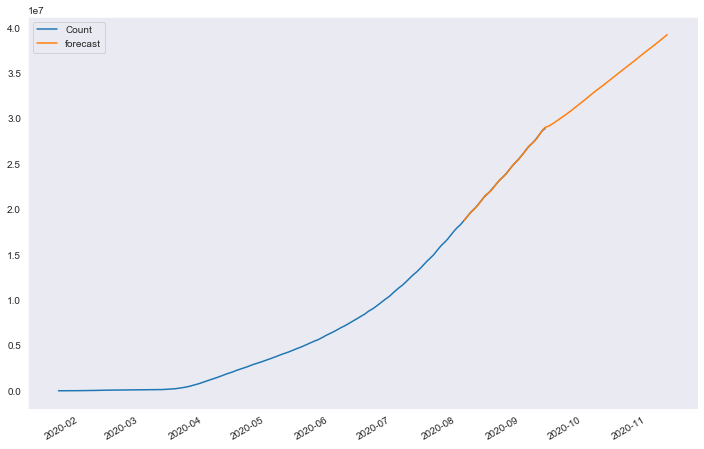

In [ ]:
future_df['forecast'] = results.predict(start = 196, end = future_df.index[-1]);
future_df[['Count', 'forecast']].plot(figsize=(12, 8));

## Accuracy metrics for confirmed cases prediction

MEAN ABSOLUTE PERCENTAGE ERROR

In [ ]:
mape = np.mean(np.abs(confirmed_to_fit['forecast']-confirmed_to_fit['Count'])/np.abs(confirmed_to_fit['Count']))
mape*100

0.1063717407144013

The prediction has an error of .106% indicating that the model is very much accurate with an accuracy of 99.9%

**Deaths forecasting**

In [ ]:
deaths_to_fit = deaths_m.groupby('Dates').sum()[confirmed_m.groupby('Dates').sum()['Count']>=0]

model = SARIMAX(deaths_to_fit['Count'],order=(1,1,0), seasonal_order=(1,1,1,12))
results = model.fit()
print(results.summary())

C:\Users\indra\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                                 Statespace Model Results                                 
Dep. Variable:                              Count   No. Observations:                  236
Model:             SARIMAX(1, 1, 0)x(1, 1, 1, 12)   Log Likelihood               -1888.637
Date:                            Tue, 03 Nov 2020   AIC                           3785.273
Time:                                    02:09:18   BIC                           3798.902
Sample:                                01-22-2020   HQIC                          3790.775
                                     - 09-13-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9092      0.025     36.889      0.000       0.861       0.958
ar.S.L12      -0.2785      0.071   

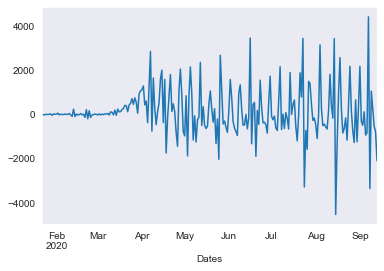

In [ ]:
results.resid.plot();

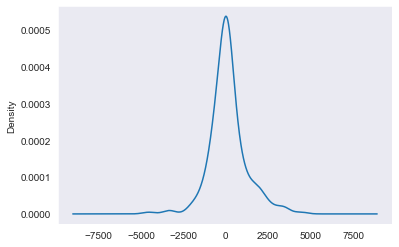

In [ ]:
results.resid.plot(kind='kde');

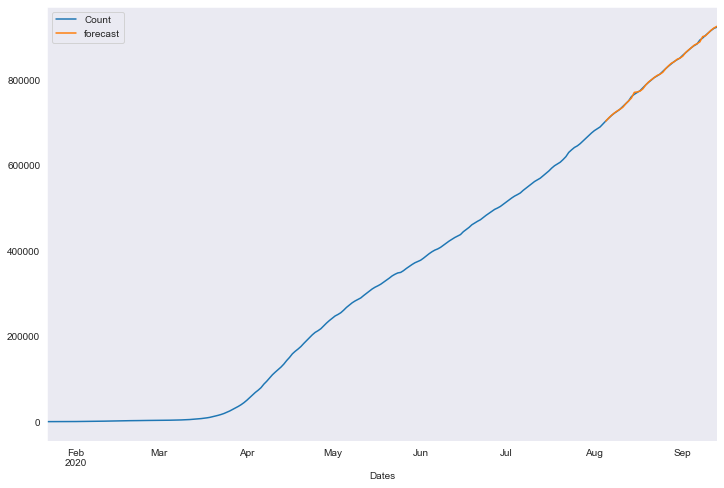

In [ ]:
deaths_to_fit['forecast'] = results.predict(start = 196, end= 236);
deaths_to_fit[['Count','forecast']].plot(figsize=(12,8));

In [ ]:
n = 60
last_date = deaths_to_fit.index[-1]

future_dates = [last_date+DateOffset(days=x) for x in range(1, n)]

In [ ]:
future_dates_df = pd.DataFrame(index=future_dates[1:],columns=deaths_to_fit.columns)
future_df = pd.concat([deaths_to_fit,future_dates_df])
future_df.tail()

,Count,forecast
2020-11-07,NaN,NaN
2020-11-08,NaN,NaN
2020-11-09,NaN,NaN
2020-11-10,NaN,NaN
2020-11-11,NaN,NaN


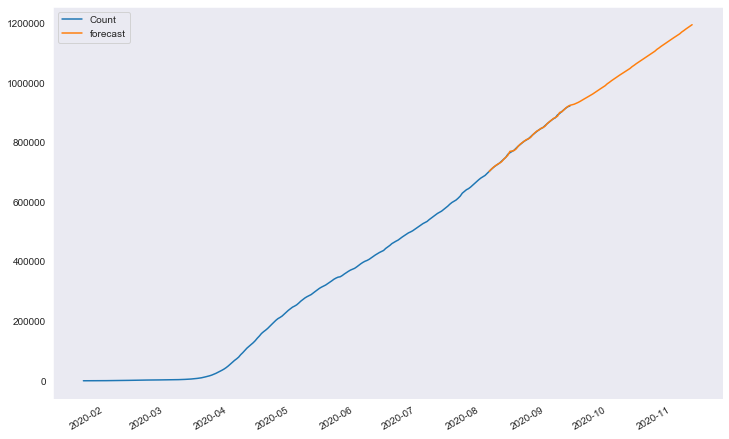

In [ ]:
future_df['forecast'] = results.predict(start = 196, end = future_df.index[-1]);
future_df[['Count', 'forecast']].plot(figsize=(12, 8));

In [ ]:
mape = np.mean(np.abs(deaths_to_fit['forecast']-deaths_to_fit['Count'])/np.abs(deaths_to_fit['Count']))
mape*100

0.13808435650831333

The prediction has an error of .13% indicating that the model is very much accurate with an accuracy of 99.86%

**Recovered Cases forecasting**

In [ ]:
recovered_to_fit = recovered_m.groupby('Dates').sum()[recovered_m.groupby('Dates').sum()['Count']>=0]

model = SARIMAX(recovered_to_fit['Count'],order=(1,1,0), seasonal_order=(1,1,1,12))
results = model.fit()
print(results.summary())

C:\Users\indra\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                                 Statespace Model Results                                 
Dep. Variable:                              Count   No. Observations:                  236
Model:             SARIMAX(1, 1, 0)x(1, 1, 1, 12)   Log Likelihood               -2635.202
Date:                            Tue, 03 Nov 2020   AIC                           5278.405
Time:                                    02:09:55   BIC                           5292.033
Sample:                                01-22-2020   HQIC                          5283.907
                                     - 09-13-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4353      0.063      6.870      0.000       0.311       0.560
ar.S.L12      -0.3240      0.108   

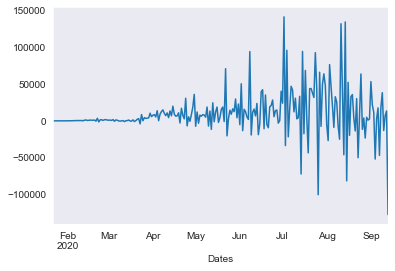

In [ ]:
results.resid.plot();

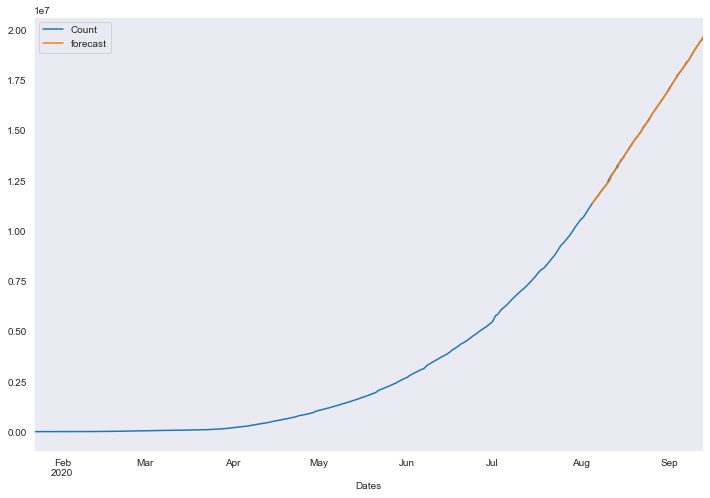

In [ ]:
recovered_to_fit['forecast'] = results.predict(start = 196, end= 236);
recovered_to_fit[['Count','forecast']].plot(figsize=(12,8));

In [ ]:
from pandas.tseries.offsets import DateOffset

In [ ]:
n = 60
last_date = recovered_to_fit.index[-1]

future_dates = [last_date+DateOffset(days=x) for x in range(1, n)]

In [ ]:
future_dates_df = pd.DataFrame(index=future_dates[1:],columns=recovered_to_fit.columns)
future_df = pd.concat([recovered_to_fit,future_dates_df])
future_df.tail()

,Count,forecast
2020-11-07,NaN,NaN
2020-11-08,NaN,NaN
2020-11-09,NaN,NaN
2020-11-10,NaN,NaN
2020-11-11,NaN,NaN


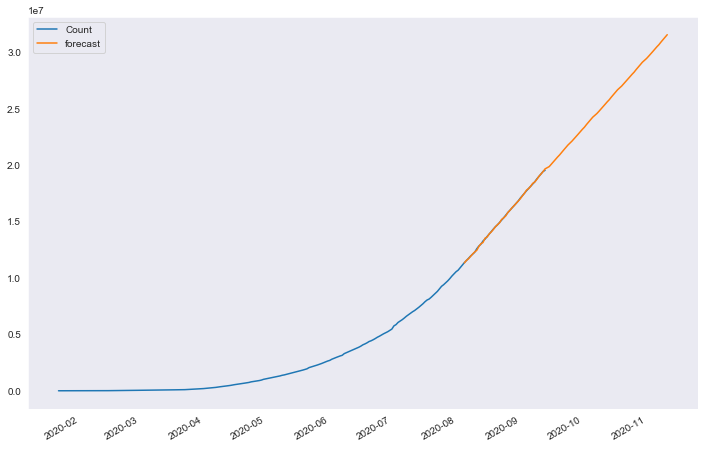

In [ ]:
future_df['forecast'] = results.predict(start = 196, end = future_df.index[-1]);
future_df[['Count', 'forecast']].plot(figsize=(12, 8));

In [ ]:
mape = np.mean(np.abs(recovered_to_fit['forecast']-recovered_to_fit['Count'])/np.abs(recovered_to_fit['Count']))
mape*100

0.22739627665686024

The prediction has an error of .13% indicating that the model is very much accurate with an accuracy of 99.78%

# CB.EN.U4CSE17310


## PART-1: Exploratory Data Analysis

## 1. Getting the data

In [ ]:
# storing the file paths of our datasets

dfs = [
    'https://raw.githubusercontent.com/Ashwin1999/COVID-19-Data-Mining/master/COVID-Time%20Series%20Data/COVID-Time%20Series%20Data%20-%20Refined/confirmed.csv',
    'https://raw.githubusercontent.com/Ashwin1999/COVID-19-Data-Mining/master/COVID-Time%20Series%20Data/COVID-Time%20Series%20Data%20-%20Refined/deaths.csv',
    'https://raw.githubusercontent.com/Ashwin1999/COVID-19-Data-Mining/master/COVID-Time%20Series%20Data/COVID-Time%20Series%20Data%20-%20Refined/recovered.csv',
]

In [ ]:
confirmed = pd.read_csv(dfs[0])
deaths = pd.read_csv(dfs[1])
recovered = pd.read_csv(dfs[2])

In [ ]:
confirmed.head(3)

,State,Country,Latitude,Longitude,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,38304,38324,38398,38494,38520,38544,38572,38606,38641,38716
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,9967,10102,10255,10406,10553,10704,10860,11021,11185,11353
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,45773,46071,46364,46653,46938,47216,47488,47752,48007,48254


In [ ]:
deaths.head(3)

,State,Country,Latitude,Longitude,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20
0,Alabama,US,32.539527,-86.644082,0,0,0,0,0,0,...,23,23,23,23,23,23,23,23,23,23
1,Alabama,US,30.727750,-87.722071,0,0,0,0,0,0,...,42,42,42,42,42,42,42,43,43,43
2,Alabama,US,31.868263,-85.387129,0,0,0,0,0,0,...,7,7,7,7,7,7,7,7,7,7


In [ ]:
recovered.head(3)

,State,Country,Latitude,Longitude,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,29713,30082,30537,30557,30715,31048,31129,31154,31234,31638
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,5882,5976,6106,6186,6239,6284,6346,6443,6494,6569
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,32259,32481,32745,32985,33183,33379,33562,33723,33875,34037


## 2. Reshaping the data into a manageable format

In [ ]:
confirmed = confirmed.melt(['State', 'Country'], confirmed.columns[4:], var_name='Dates', value_name='Confirmed')
confirmed.Dates = pd.to_datetime(confirmed.Dates)

deaths = deaths.melt(['State', 'Country'], deaths.columns[4:], var_name='Dates', value_name='Deaths')
deaths.Dates = pd.to_datetime(deaths.Dates)

recovered = recovered.melt(['State', 'Country'], recovered.columns[4:], var_name='Dates', value_name='Recovered')
recovered.Dates = pd.to_datetime(recovered.Dates)

In [ ]:
confirmed.head()

,State,Country,Dates,Confirmed
0,NaN,Afghanistan,2020-01-22,0
1,NaN,Albania,2020-01-22,0
2,NaN,Algeria,2020-01-22,0
3,NaN,Andorra,2020-01-22,0
4,NaN,Angola,2020-01-22,0


In [ ]:
confirmed_dates = confirmed.groupby('Dates').sum().reset_index()
deaths_dates = deaths.groupby('Dates').sum().reset_index()
recovered_dates = recovered.groupby('Dates').sum().reset_index()

In [ ]:
confirmed_dates.head()

,Dates,Confirmed
0,2020-01-22,556
1,2020-01-23,655
2,2020-01-24,943
3,2020-01-25,1436
4,2020-01-26,2123


In [ ]:
combined=pd.DataFrame({
    'Date': confirmed_dates.Dates,
    'Confirmed': confirmed_dates.Confirmed,
    'Deaths': deaths_dates.Deaths,
    'Recovered': recovered_dates.Recovered
})
combined = combined.melt('Date', combined.columns[1:], var_name='Condition', value_name='Count')
combined.head()

,Date,Condition,Count
0,2020-01-22,Confirmed,556
1,2020-01-23,Confirmed,655
2,2020-01-24,Confirmed,943
3,2020-01-25,Confirmed,1436
4,2020-01-26,Confirmed,2123


## 3. Graphing the number of confirmed cases, deaths and recoveries

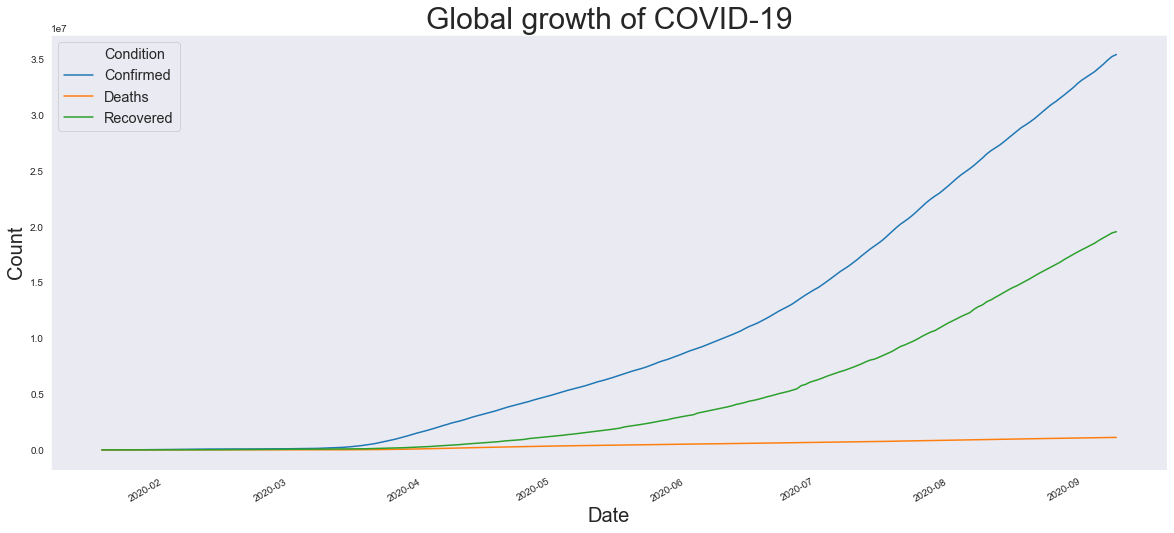

In [ ]:
sns.set_style("dark")

plt.figure(figsize=(20,8));

growth = sns.lineplot(combined["Date"], combined["Count"], hue=combined["Condition"]);

growth.set_title("Global growth of COVID-19",fontsize=30);
growth.set_xlabel("Date",fontsize=20);
growth.set_ylabel("Count",fontsize=20);

plt.xticks(rotation=30);
plt.legend(fontsize='x-large');

### a. Number of confirmed cases of COVID-19 on a daily, weekly and monthly basis

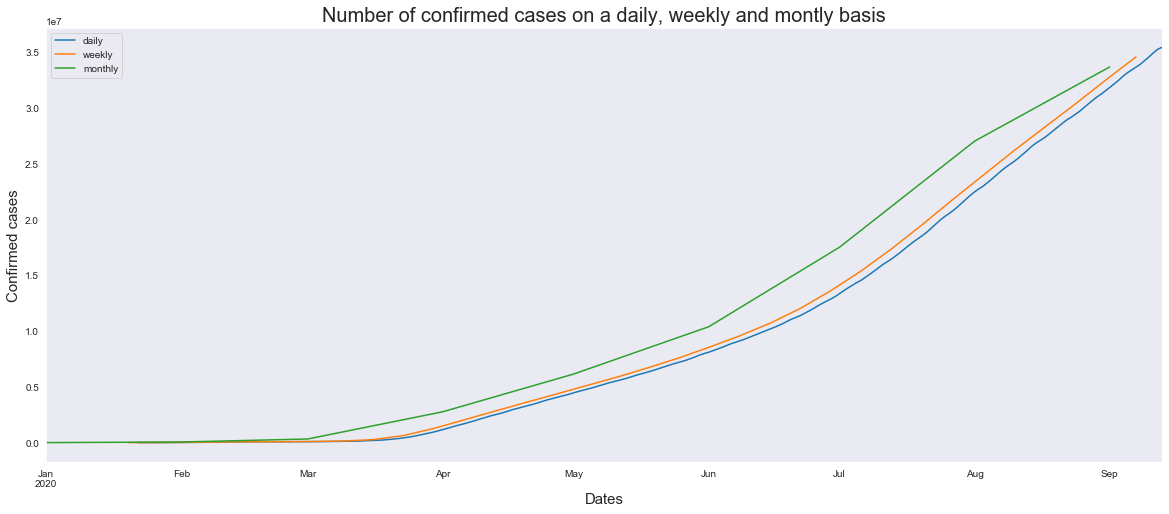

In [ ]:
plt.figure(figsize=(20,8));

conf = confirmed.groupby('Dates').sum()

conf.Confirmed.resample('d').mean().plot(label='daily');
conf.Confirmed.resample('w').mean().plot(label='weekly');
conf.Confirmed.resample('m').mean().plot(label='monthly');

plt.title('Number of confirmed cases on a daily, weekly and montly basis',fontsize=20);
plt.ylabel('Confirmed cases',fontsize=15);
plt.xlabel('Dates',fontsize=15)

plt.legend();

### b. Number of COVID-19 related deaths on a daily, weekly and monthly basis

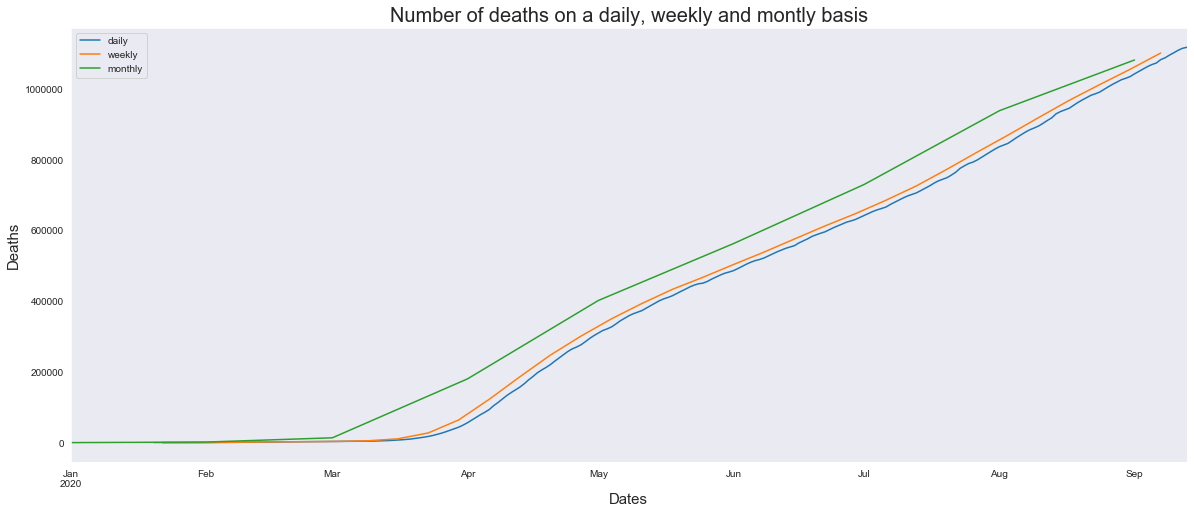

In [ ]:
plt.figure(figsize=(20,8));

mort = deaths.groupby('Dates').sum()

mort.Deaths.resample('d').mean().plot(label='daily');
mort.Deaths.resample('w').mean().plot(label='weekly');
mort.Deaths.resample('m').mean().plot(label='monthly');

plt.title('Number of deaths on a daily, weekly and montly basis', fontsize=20);
plt.ylabel('Deaths',fontsize=15);
plt.xlabel('Dates',fontsize=15)

plt.legend();

### c. Number of recovery from COVID-19 on a daily, weekly and monthly basis

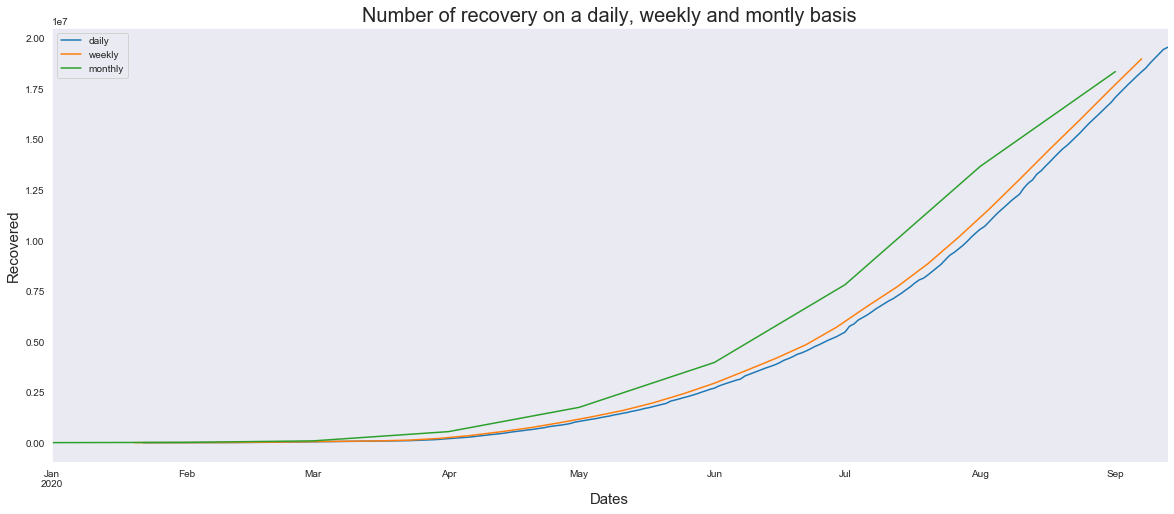

In [ ]:
plt.figure(figsize=(20,8));

rec = recovered.groupby('Dates').sum()

rec.Recovered.resample('d').mean().plot(label='daily');
rec.Recovered.resample('w').mean().plot(label='weekly');
rec.Recovered.resample('m').mean().plot(label='monthly');

plt.title('Number of recovery on a daily, weekly and montly basis',fontsize=20);
plt.ylabel('Recovered', fontsize=15);
plt.xlabel('Dates',fontsize=15)

plt.legend();

## 4. Pie Chart Visualizations for COVID-19

### a. Confirmed COVID-19 cases

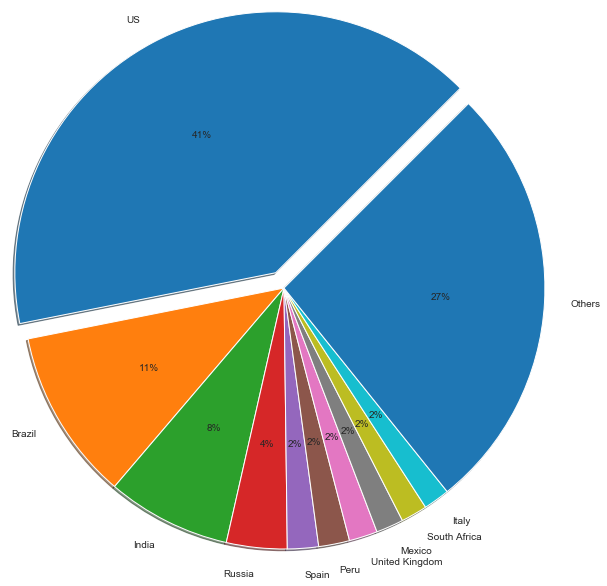

In [ ]:
confirmed_country = confirmed.groupby('Country').sum().reset_index()
confirmed_country.sort_values(by='Confirmed', ascending=False, inplace=True)
confirmed_country_top10 = confirmed_country.iloc[:10,:]
others = pd.DataFrame({'Country': ['Others'], 'Confirmed':[sum(confirmed_country.iloc[10:,:].Confirmed)]})
confirmed_country_top10 = pd.concat([confirmed_country_top10,others]).reset_index().drop('index', axis=1)

plt.axis("equal")
plt.pie(confirmed_country_top10.Confirmed, labels=confirmed_country_top10.Country, radius=3, autopct='%0.0f%%', shadow=True, startangle=45,explode=[0.2,0,0,0,0,0,0,0,0,0,0])
plt.show()

### b. COVID-19 related deaths

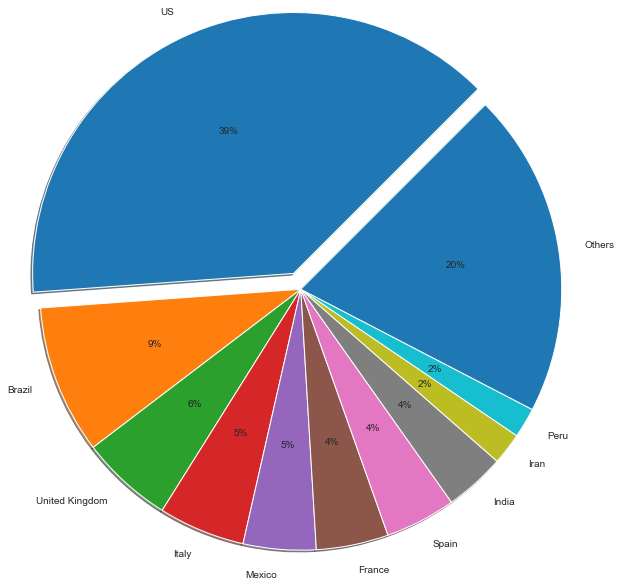

In [ ]:
deaths_country = deaths.groupby('Country').sum().reset_index()
deaths_country.sort_values(by='Deaths', ascending=False, inplace=True)
deaths_country_top10 = deaths_country.iloc[:10,:]
others = pd.DataFrame({'Country': ['Others'], 'Deaths':[sum(deaths_country.iloc[10:,:].Deaths)]})
deaths_country_top10 = pd.concat([deaths_country_top10,others]).reset_index().drop('index', axis=1)

plt.axis("equal")
plt.pie(deaths_country_top10.Deaths, labels=deaths_country_top10.Country, radius=3, autopct='%0.0f%%', shadow=True, startangle=45,explode=[0.2,0,0,0,0,0,0,0,0,0,0])
plt.show()

### c. Recovery from COVID-19

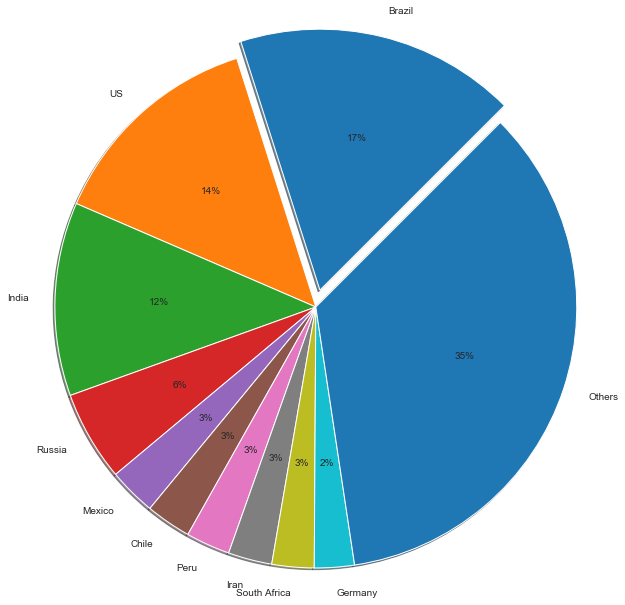

In [ ]:
recovered_country = recovered.groupby('Country').sum().reset_index()
recovered_country.sort_values(by='Recovered', ascending=False, inplace=True)
recovered_country_top10 = recovered_country.iloc[:10,:]
others = pd.DataFrame({'Country': ['Others'], 'Recovered':[sum(recovered_country.iloc[10:,:].Recovered)]})
recovered_country_top10 = pd.concat([recovered_country_top10,others]).reset_index().drop('index', axis=1)

plt.axis("equal")
plt.pie(recovered_country_top10.Recovered, labels=recovered_country_top10.Country, radius=3, autopct='%0.0f%%', shadow=True, startangle=45,explode=[0.2,0,0,0,0,0,0,0,0,0,0])
plt.show()

## 5. Mortality rate and recovery rate visualized

In [ ]:
confirmed_country = confirmed.groupby('Country').sum().reset_index()
deaths_country = deaths.groupby('Country').sum().reset_index()
recovered_country = recovered.groupby('Country').sum().reset_index()

combined_countries = confirmed_country.merge(deaths_country, on=['Country']).merge(recovered_country,on=['Country'])
combined_countries.head()

,Country,Confirmed,Deaths,Recovered
0,Afghanistan,3745342,114595,2139148
1,Albania,583139,17360,329905
2,Algeria,3088876,145505,2089806
3,Andorra,145841,7952,111054
4,Angola,125569,5483,45985


## World Covid19 cases

Number of active cases can be calculated by subtracting the sum of recovered and death cases from the confirmed cases

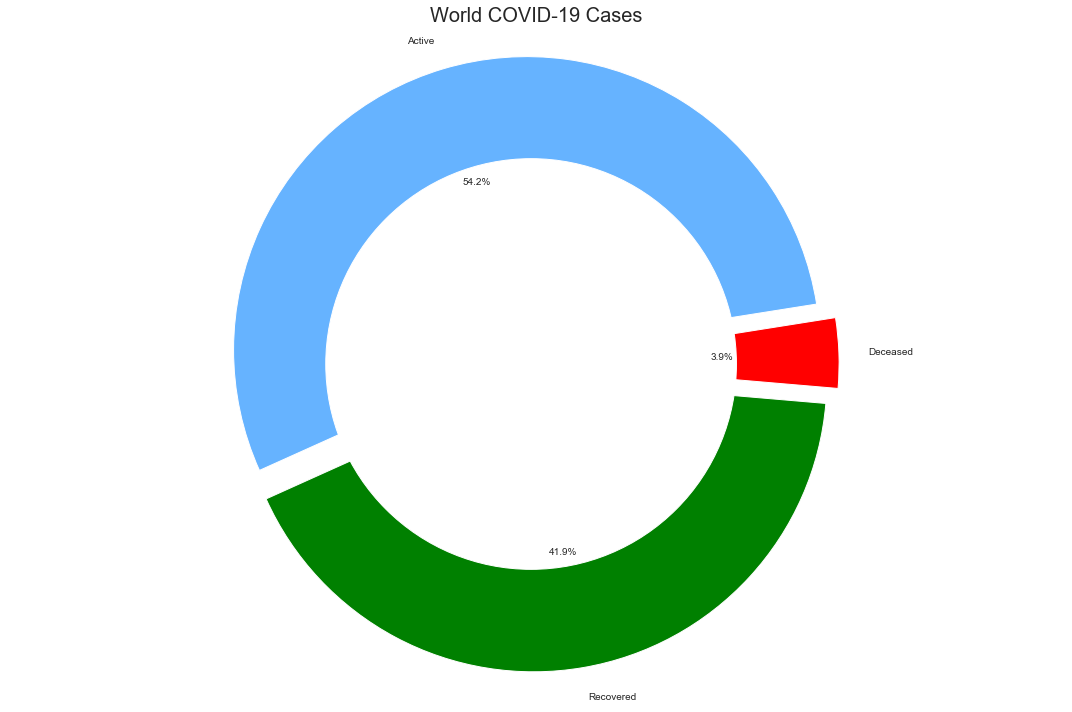

In [ ]:
conf=combined_countries['Confirmed'].sum()
deth=combined_countries['Deaths'].sum()
rec=combined_countries['Recovered'].sum()
active=conf-(rec-deth)
labels = ['Active','Recovered','Deceased']
sizes = [active,rec,deth]
color= ['#66b3ff','green','red']
explode = []

for i in labels:
    explode.append(0.05)
    
plt.figure(figsize= (15,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=9, explode =explode,colors = color)
centre_circle = plt.Circle((0,0),0.70,fc='white')

fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('World COVID-19 Cases',fontsize = 20)
plt.axis('equal')  
plt.tight_layout()

The dataset we have contains the columns confirmed cases, deaths and recovery. We can make use of these fields and get two other fields, <b>Mortality rate</b> and <b>Recovery rate</b>, which are equally important in our analysis

In [ ]:
combined_countries['Mortality_rate'] = combined_countries['Deaths']/combined_countries['Confirmed']
combined_countries['Recovery_rate'] = combined_countries['Recovered']/combined_countries['Confirmed']

combined_countries.head()

,Country,Confirmed,Deaths,Recovered,Mortality_rate,Recovery_rate
0,Afghanistan,3745342,114595,2139148,0.030597,0.571149
1,Albania,583139,17360,329905,0.029770,0.565740
2,Algeria,3088876,145505,2089806,0.047106,0.676559
3,Andorra,145841,7952,111054,0.054525,0.761473
4,Angola,125569,5483,45985,0.043665,0.366213


In [ ]:
x, y = 10, 20

top20_mortality = combined_countries.sort_values(by='Mortality_rate', ascending=False).reset_index().loc[:x,['Country','Mortality_rate']]
top20_recovery = combined_countries.sort_values(by='Recovery_rate', ascending=False).reset_index().loc[:y,['Country','Recovery_rate']]

otherMortality = sum(combined_countries.sort_values(by='Mortality_rate', ascending=False).loc[x:,['Country','Mortality_rate']]['Mortality_rate'])
otherRecovery = sum(combined_countries.sort_values(by='Recovery_rate', ascending=False).loc[y:,['Country','Recovery_rate']]['Recovery_rate'])

otherMortality = pd.DataFrame({
    'Country':['Others'],
    'Mortality_rate':[otherMortality]
})

otherRecovery = pd.DataFrame({
    'Country':['Others'],
    'Recovery_rate':[otherRecovery]
})

top20_mortality = pd.concat([top20_mortality,otherMortality])
top20_recovery = pd.concat([top20_recovery,otherRecovery])

### a. Top 10 countries with high COVID-19 mortality rate

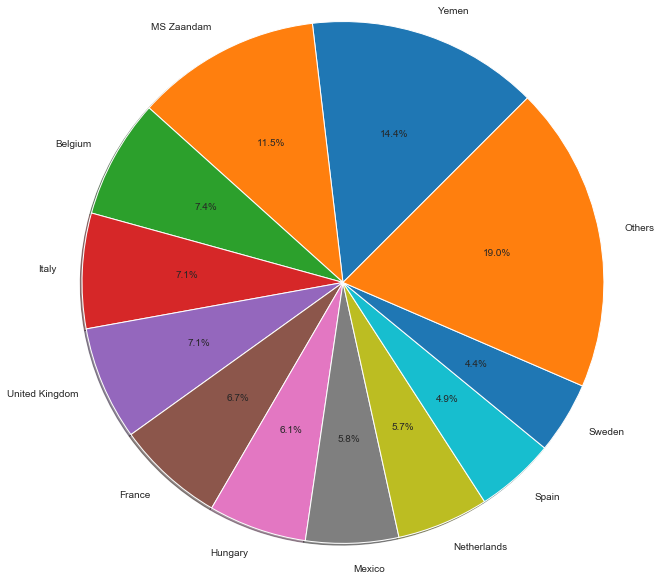

In [ ]:
plt.axis("equal")
plt.pie(top20_mortality.Mortality_rate, labels=top20_mortality.Country, radius=3, autopct='%0.1f%%', shadow=True, startangle=45)
plt.show()

### b. Top 20 countries with high COVID-19 recovery rate

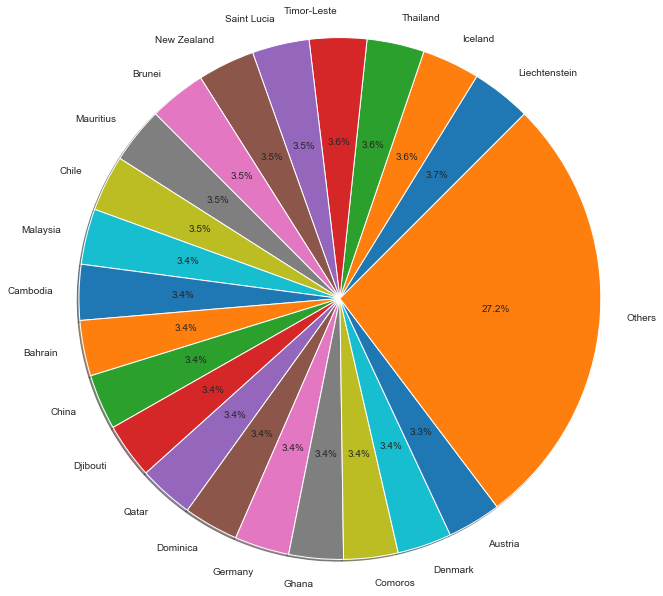

In [ ]:
plt.axis("equal")
plt.pie(top20_recovery.Recovery_rate, labels=top20_recovery.Country, radius=3, autopct='%0.1f%%', shadow=True, startangle=45)
plt.show()

## PART-2: Building the Deep learning model to forecast the number of confirmed COVID-19 cases

With the situation at hand, we are in need of a ML/DL model which is capable of forecasting the expected number of confirmed cases in the near future. 

Here, I've trained a deep learning model which uses LSTM for forcasting into the future.

The model will learn different trends in the provided timeseries data and will help us forecast the supposed number of cases.

## 1. Loading the data

The goal here is to build a deep learning model which uses LSTM to forecast the number of active cases in the world.

In [ ]:
# dfs[0] has the link to the confirmed.csv dataset, which is the dataset I'm going to train this model on
confirmed = pd.read_csv(dfs[0])

# I've use the pandas melt to reshape the dataframe into a format that is easy to work with.
confirmed = confirmed.melt(['State', 'Country'], confirmed.columns[4:], var_name='Dates', value_name='Confirmed')

""" 

Also, I convert the date column from string object to datetime object since we have the need to perform timeseries 
forecasting.


"""

confirmed.Dates = pd.to_datetime(confirmed.Dates)

confirmed.head()

,State,Country,Dates,Confirmed
0,NaN,Afghanistan,2020-01-22,0
1,NaN,Albania,2020-01-22,0
2,NaN,Algeria,2020-01-22,0
3,NaN,Andorra,2020-01-22,0
4,NaN,Angola,2020-01-22,0


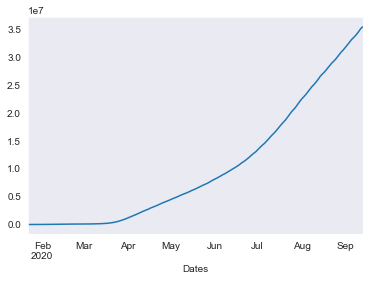

In [ ]:
"""

I've then use the pandas groupby to group the confirmed cases by the date

Note: Since we are using the global data, when we use groupby we essentially sum all the confirmed cases for a given day
ie if we have 100 cases in place-1 and 200 cases in place-2 on a given day, when we use groupby date the total number of
cases for that date is taken ie 200+100=300.


"""

days = confirmed.groupby('Dates').sum()
days.Confirmed.resample('d').sum().plot();

In [ ]:
days.head()

,Confirmed
Dates,
2020-01-22,556
2020-01-23,655
2020-01-24,943
2020-01-25,1436
2020-01-26,2123


In [ ]:
days.tail()

,Confirmed
Dates,
2020-09-09,34222892
2020-09-10,34557534
2020-09-11,34924974
2020-09-12,35244068
2020-09-13,35422326


In [ ]:
# total number of rows in our dataset

len(days)

236

## 2. Preparing the data for the LSTM model

In [ ]:
# I've taken the number of data in the test set is taken as 25, which basically is the last 25 days of our timeseries.
# The remaining is used traing our LSTM model

test_size = 25
test_ind = len(days) - test_size

train = days.iloc[:test_ind,:]
test = days.iloc[test_ind:,:]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# The data is normalized
scaler = MinMaxScaler(feature_range=(0,1))

scaler.fit(train)

scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [ ]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

"""

I've set the batch size for the model as 20. 

I'll be passing the data of the previous 20 days to predict the estimated number of cases for the  next day

To make the work easy, I've used the Tensorflow's TimeseriesGenerator to make the training and validation timeseries data
That we have to train the model with

Note: batch size should be less than len(test)


"""

BS = 20

generator = TimeseriesGenerator(scaled_train, scaled_train, length=BS, batch_size=1)

In [ ]:
x1, y1 = generator[0]
x2, y2 = generator[1]

In [ ]:
# given data of last BS days it will predict the expected number of cases for the (BS+1)th day

print(f'example 1: {x1}\n{y1}\n\n\nexample 2: {x2}\n{y2}')

example 1: [[[0.00000000e+00]
  [3.54362670e-06]
  [1.38523589e-05]
  [3.14989040e-05]
  [5.60895256e-05]
  [8.50470407e-05]
  [1.79937489e-04]
  [2.00984484e-04]
  [2.75006908e-04]
  [3.35642298e-04]
  [4.11275462e-04]
  [5.81262161e-04]
  [6.92331592e-04]
  [8.35902164e-04]
  [9.69951477e-04]
  [1.08302538e-03]
  [1.21163398e-03]
  [1.30949534e-03]
  [1.41795180e-03]
  [1.51133889e-03]]]
[[0.00158447]]


example 2: [[[3.54362670e-06]
  [1.38523589e-05]
  [3.14989040e-05]
  [5.60895256e-05]
  [8.50470407e-05]
  [1.79937489e-04]
  [2.00984484e-04]
  [2.75006908e-04]
  [3.35642298e-04]
  [4.11275462e-04]
  [5.81262161e-04]
  [6.92331592e-04]
  [8.35902164e-04]
  [9.69951477e-04]
  [1.08302538e-03]
  [1.21163398e-03]
  [1.30949534e-03]
  [1.41795180e-03]
  [1.51133889e-03]
  [1.58446646e-03]]]
[[0.00159943]]


In [ ]:
valGenerator = TimeseriesGenerator(scaled_test, scaled_test, length=BS, batch_size=1)

## 3. Building and compiling the model

In [ ]:
# part 1: Building the model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

n_features = 1
model = Sequential()

# a. Input layer: An LSTM layer with 128 cells and rectified linear unit as activation.
model.add(LSTM(128, activation='relu', input_shape=(BS, n_features))) # the input shape is 20x1
# b. Final layer: A dense layer with just one neuron.
model.add(Dense(1))


# ----------------------------------------------------------------------------------------------------------------------------
# part 2: compiling the model

from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(), loss='mse')
print(model.summary())


# ----------------------------------------------------------------------------------------------------------------------------
# part 3: training the model

EPOCHS = 25
# With early stopping

from tensorflow.keras.callbacks import EarlyStopping

earlyStop = EarlyStopping(monitor='val_loss', patience=4)
H = model.fit_generator(generator, epochs=EPOCHS, validation_data=valGenerator, callbacks=[earlyStop])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 128)               66560     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/25
191/191 [==============================] - 3s 13ms/step - loss: 0.0225 - val_loss: 0.2934
Epoch 2/25
191/191 [==============================] - 2s 12ms/step - loss: 0.0017 - val_loss: 0.0164
Epoch 3/25
191/191 [==============================] - 4s 18ms/step - loss: 1.7194e-04 - val_loss: 0.0046
Epoch 4/25
191/191 [==============================] - 3s 18ms/step - loss: 1.5119e-04 - val_loss: 0.0040
Epoch 5/25
191/191 [==============================] - 3s 18ms/step - loss: 6.9625e-05 - val_los

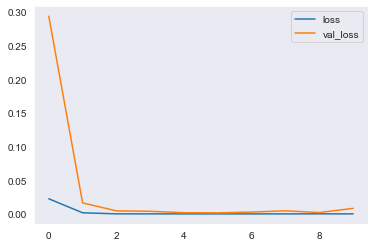

In [ ]:
losses = pd.DataFrame(H.history)
losses.plot();

From the above diagram we can clearly see that the training and validation <b>loss</b> is <b>significantly low</b> (lower the loss, the better).

Now let us try evaluating our trained model for <b>forecasting</b> the number of active cases for the <b>next 25 days</b>.

## 4. Evaluating the model

To predict the values for the last 25 days we have to get the confirmed cases for the previous 20 days, which is actually present in the train set.

We bassically grab the data of the last 20 days of the train set inorder to predict/forecast the result for the first day in the test set.

Then we append this result to a list and use our predicted value along with the last 19 values in the train set to forecast the result for the second day.

By this way we can forecast for all the other days in the test set.

Since we're using the previous predicted value inorder to predict the next value, there will be some noise in the forecasted value. For forecasting the values for few days will not give us a bad result but if we had to forecast for the next 3 or 4 months, the result will be too noisy.

In [ ]:
# last 20 rows from scaled_train

first_eval_batch = scaled_train[-BS:]
print(first_eval_batch)

[[0.79313202]
 [0.80421033]
 [0.81411545]
 [0.82297194]
 [0.83429314]
 [0.8458919 ]
 [0.85823514]
 [0.87037238]
 [0.88167992]
 [0.89138677]
 [0.90130262]
 [0.91209941]
 [0.92402855]
 [0.93610895]
 [0.9493043 ]
 [0.95990888]
 [0.96902201]
 [0.97776321]
 [0.98854696]
 [1.        ]]


In [ ]:
# array to store the forcasted results
test_predictions = []

current_batch = first_eval_batch.reshape((1, BS, n_features))

count=1

for i in range(len(test)):
    
    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred) 
    
#     print(f'Result {count}:')
#     print(f'current batch:\n{current_batch},\n prediction: {current_pred}')
    
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)
    count += 1

#     print('\n\n')

In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)
print(true_predictions)

[[29421672.43471718]
 [29949548.62763977]
 [30495272.47243977]
 [31062330.90539551]
 [31649305.17306423]
 [32247279.77552509]
 [32855631.92664242]
 [33476436.47006607]
 [34110592.61572456]
 [34765070.90576744]
 [35443111.82634449]
 [36146990.04553413]
 [36876332.5577364 ]
 [37634323.23217964]
 [38422950.32192802]
 [39244668.33704567]
 [40104735.9904108 ]
 [41007479.48090172]
 [41955346.65776825]
 [42950362.40855312]
 [43996313.40617752]
 [45074089.77445698]
 [46207790.33947563]
 [47403333.23472595]
 [48666226.95362186]]


In [ ]:
test['Predictions'] = true_predictions.astype(int)
test

C:\Users\indra\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Confirmed,Predictions
Dates,,
2020-08-20,28249176,29421672
2020-08-21,28568520,29949548
2020-08-22,28878633,30495272
2020-08-23,29119151,31062330
2020-08-24,29383390,31649305
2020-08-25,29663595,32247279
2020-08-26,29995565,32855631
2020-08-27,30320729,33476436
2020-08-28,30648389,34110592


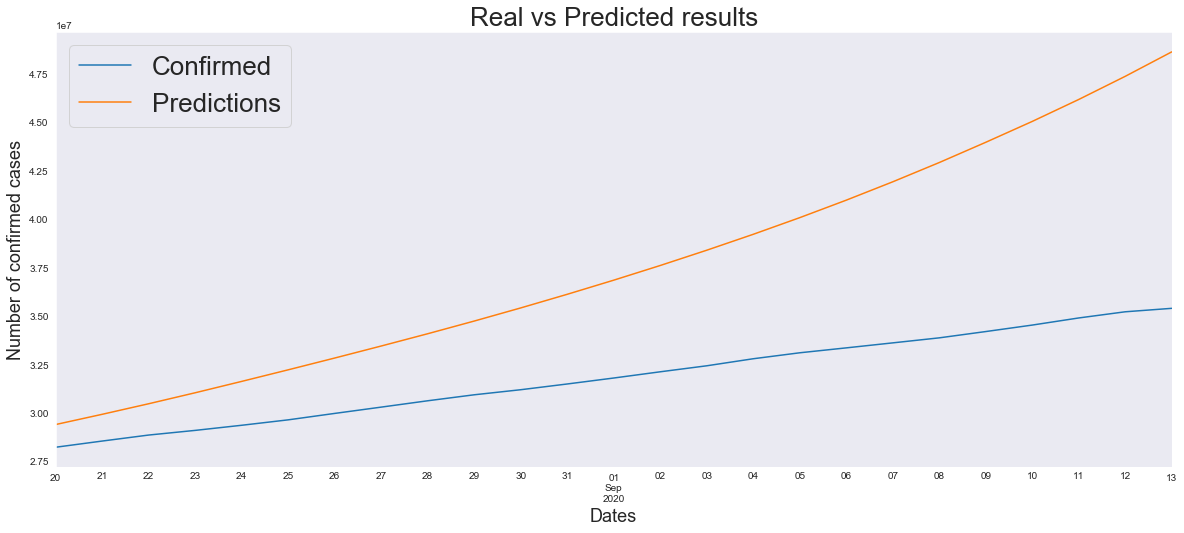

In [ ]:
test.plot(figsize=(20,8));
plt.title('Real vs Predicted results', fontsize=26)
plt.xlabel('Dates', fontsize=18)
plt.ylabel('Number of confirmed cases', fontsize=18)
plt.legend(loc=2, prop={'size': 26})

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

mse = mean_squared_error(test.Confirmed, test.Predictions)
# length = len(test)
rmse = np.sqrt(mse)

r2s = r2_score(test.Confirmed, test.Predictions) 

print(f'RMSE = {rmse}; r2 score = {r2s}')

RMSE = 6790101.537279916; r2 score = -8.697025196521194


At the first glance we might think the model's rmse is bad, but when we look the <b>coefficient of determination</b> (ie r2) we see that it has an <b>85% good fit</b>. The results are fairly good.

<u><b>Note</b></u>: We use the $r^2$ value along with the RMSE because it has a fixed range from 0 to 1. 

A value of 0 indicates that the response variable cannot be explained by the predictor variable at all. A value of 1 indicates that the response variable can be perfectly explained without error by the predictor variable.

Basically if it is closer to 1, our model is good.

## 5. Forecasting the number of confirmed cases for the next N days

In [ ]:
from pandas.tseries.offsets import DateOffset

ndays=60
last_date = days.index[-1]
future_dates = [last_date+DateOffset(days=x) for x in range(1, ndays+1)]

In [ ]:
days_copy = days.copy()
days_copy.tail()

,Confirmed
Dates,
2020-09-09,34222892
2020-09-10,34557534
2020-09-11,34924974
2020-09-12,35244068
2020-09-13,35422326


In [ ]:
# get the scaled data for the last BS days in our dataset

last_index = len(days)
last_n_days = scaler.transform(days_copy.iloc[-BS:last_index,:])
last_n_days

array([[1.06176502],
       [1.07364762],
       [1.08528661],
       [1.09701494],
       [1.10808112],
       [1.11744452],
       [1.12804727],
       [1.13907647],
       [1.15058209],
       [1.16167657],
       [1.17469196],
       [1.18571757],
       [1.19479831],
       [1.20403938],
       [1.21332328],
       [1.22496145],
       [1.2369397 ],
       [1.25009192],
       [1.26151364],
       [1.26789424]])

In [ ]:
# array to store the forcasted results for the next ndays
test_predictions_ndays = []

current_batch = last_n_days.reshape((1, BS, n_features))

count=1

for i in range(ndays):
    
    current_pred = model.predict(current_batch)[0]
    test_predictions_ndays.append(current_pred) 
    
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)
    count += 1

In [ ]:
true_predictions_ndays = scaler.inverse_transform(test_predictions_ndays).astype(int)
future_dates_df = pd.DataFrame(index=future_dates[:],columns=days.columns, data=true_predictions_ndays)
future_df = pd.concat([days_copy,future_dates_df])

In [ ]:
future_df.head()

,Confirmed
2020-01-22,556
2020-01-23,655
2020-01-24,943
2020-01-25,1436
2020-01-26,2123


In [ ]:
future_df.tail()

,Confirmed
2020-11-08,-2147483648
2020-11-09,-2147483648
2020-11-10,-2147483648
2020-11-11,-2147483648
2020-11-12,-2147483648


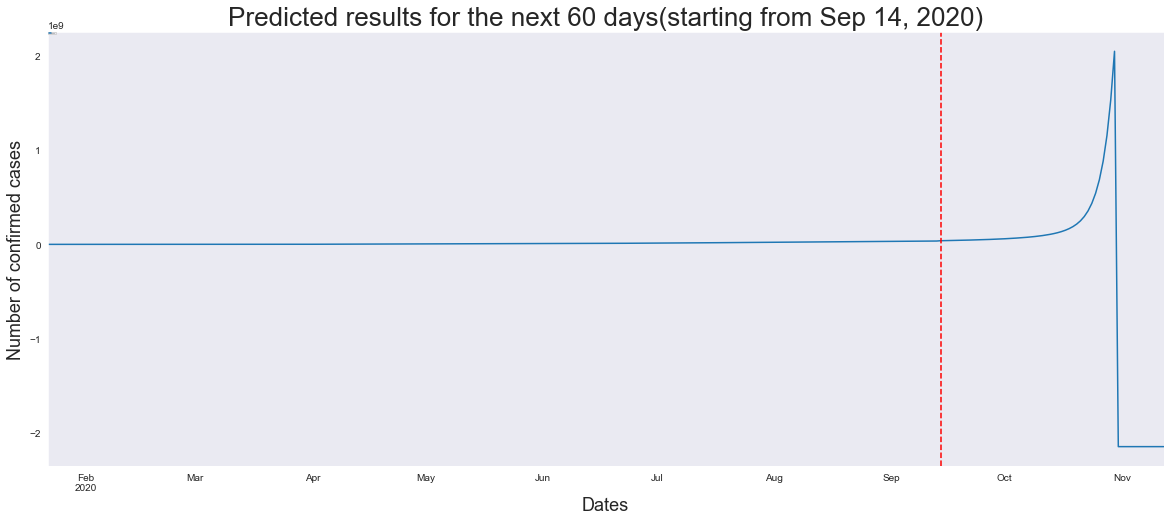

In [ ]:
future_df.plot(figsize=(20,8));

plt.axvline("2020-09-14", color="red", linestyle="--");

plt.title(f'Predicted results for the next {ndays} days(starting from Sep 14, 2020)', fontsize=26);
plt.xlabel('Dates', fontsize=18);
plt.ylabel('Number of confirmed cases', fontsize=18);
plt.legend(loc=2, prop={'size': 0});

From the above graph, we can tell that the values are most probably fairly accurate. Since we dont have the actual values we can never be too sure but it more or less looks like a good forecast.

We then save our models architecture and weights.

In [ ]:
name = 'model1_weights.h5'

model.save_weights(name)
model.save('model1_architecture.h5')

# CB.EN.U4CSE17337

## India Covid Data


In [ ]:
indiadaily=pd.read_csv('https://raw.githubusercontent.com/Ashwin1999/COVID-19-Data-Mining/Arnab/COVID-DataTimeSeries(India)/nation_level_daily.csv')
indiadaily['Date'] = indiadaily['Date'].str.slice(0,6) +' 2020'
indiadaily['Date']= indiadaily['Date'].astype(str).apply(lambda x: datetime.datetime.strptime(x,'%d %b %Y'))
indiadaily['Date']= pd.to_datetime(indiadaily['Date'])
indiadaily.rename(columns={'Daily Confirmed':'casesdaily',
                   'Total Confirmed':'cases',
                   'Daily Recovered':'recoverydaily',
                   'Total Recovered':'recovery', 
                   'Daily Deceased' :'deathdaily',
                   'Total Deceased':'death'},inplace=True)
print(indiadaily.dtypes)
indiadaily.tail()

Date             datetime64[ns]
casesdaily                int64
cases                     int64
recoverydaily             int64
recovery                  int64
deathdaily                int64
death                     int64
dtype: object


,Date,casesdaily,cases,recoverydaily,recovery,deathdaily,death
185,2020-08-02,52672,1804857,40355,1187261,760,38180
186,2020-08-03,50488,1855345,43070,1230331,806,38986
187,2020-08-04,51282,1906627,51220,1281551,849,39835
188,2020-08-05,56626,1963253,45583,1327134,919,40754
189,2020-08-06,62170,2025423,50141,1377275,899,41653


In [ ]:
complete = pd.read_csv('https://raw.githubusercontent.com/Ashwin1999/COVID-19-Data-Mining/Arnab/COVID-DataTimeSeries(India)/complete.csv')
complete['Date']= pd.to_datetime(complete['Date'])
complete.rename(columns={'Name of State / UT':'State'},inplace=True)
complete['Death'] = complete['Death'].str.extract('(\d+)', expand=False)
complete['Death'] = complete['Death'].astype(int)
print(complete.dtypes)
complete.head()

Date                         datetime64[ns]
State                                object
Latitude                            float64
Longitude                           float64
Total Confirmed cases               float64
Death                                 int64
Cured/Discharged/Migrated           float64
New cases                             int64
New deaths                            int64
New recovered                         int64
dtype: object


,Date,State,Latitude,Longitude,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New deaths,New recovered
0,2020-01-30,Kerala,10.8505,76.2711,1.0,0,0.0,0,0,0
1,2020-01-31,Kerala,10.8505,76.2711,1.0,0,0.0,0,0,0
2,2020-02-01,Kerala,10.8505,76.2711,2.0,0,0.0,1,0,0
3,2020-02-02,Kerala,10.8505,76.2711,3.0,0,0.0,1,0,0
4,2020-02-03,Kerala,10.8505,76.2711,3.0,0,0.0,0,0,0


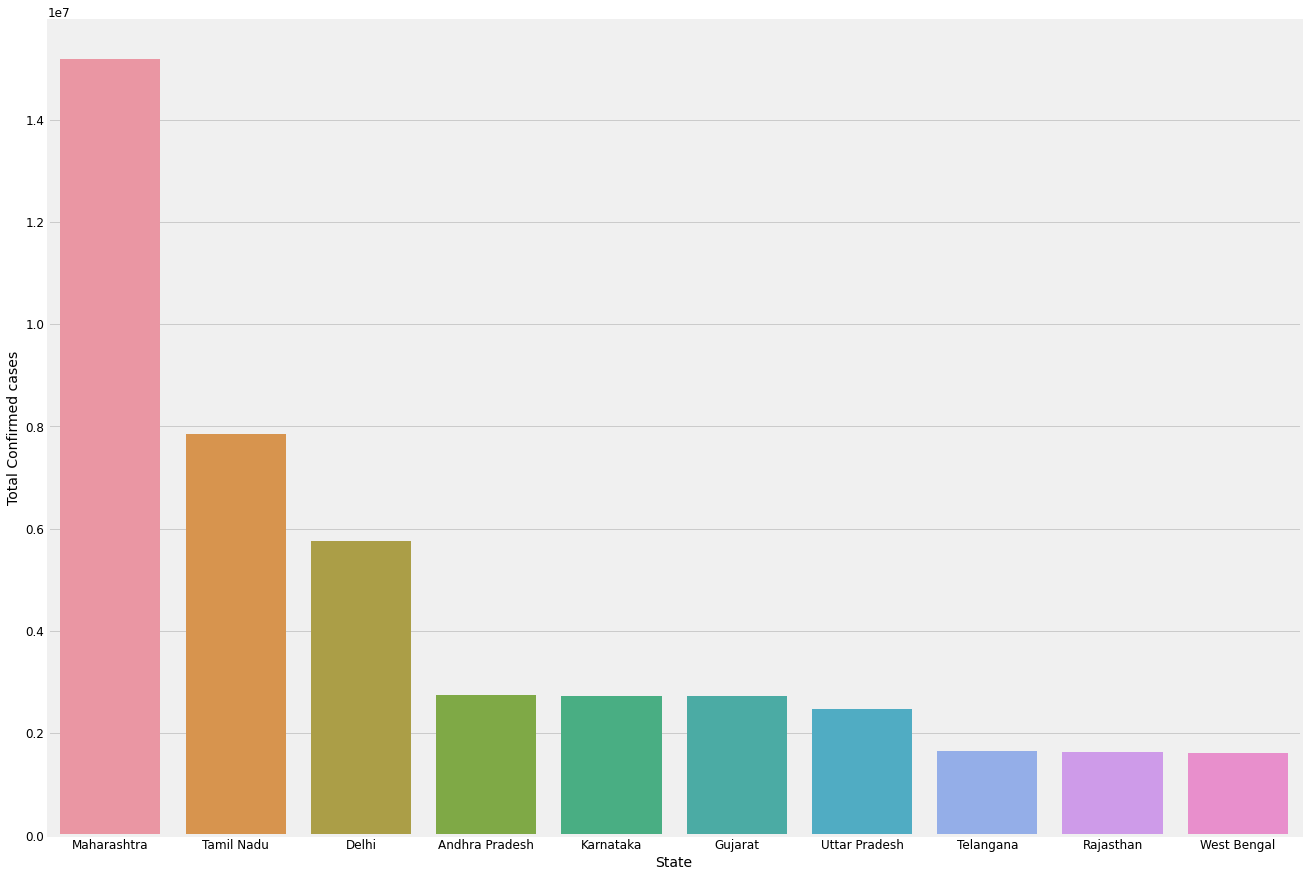

In [ ]:
plt.figure(figsize=(20,15))
statewisedata=complete.groupby('State').sum()
statewisedata.reset_index(inplace=True)
statewisedata.sort_values(by='Total Confirmed cases',inplace=True,ascending=False)
sns.barplot(y='Total Confirmed cases',x='State',data=statewisedata.iloc[:10])
# # statewisedata.plot.bar(rot=0,figsize=(20,10))
# # statewisedata.plot.bar(rot=0,figsize=(20,10))

# plt.xticks(rotation=70)
# statewisedata.head()

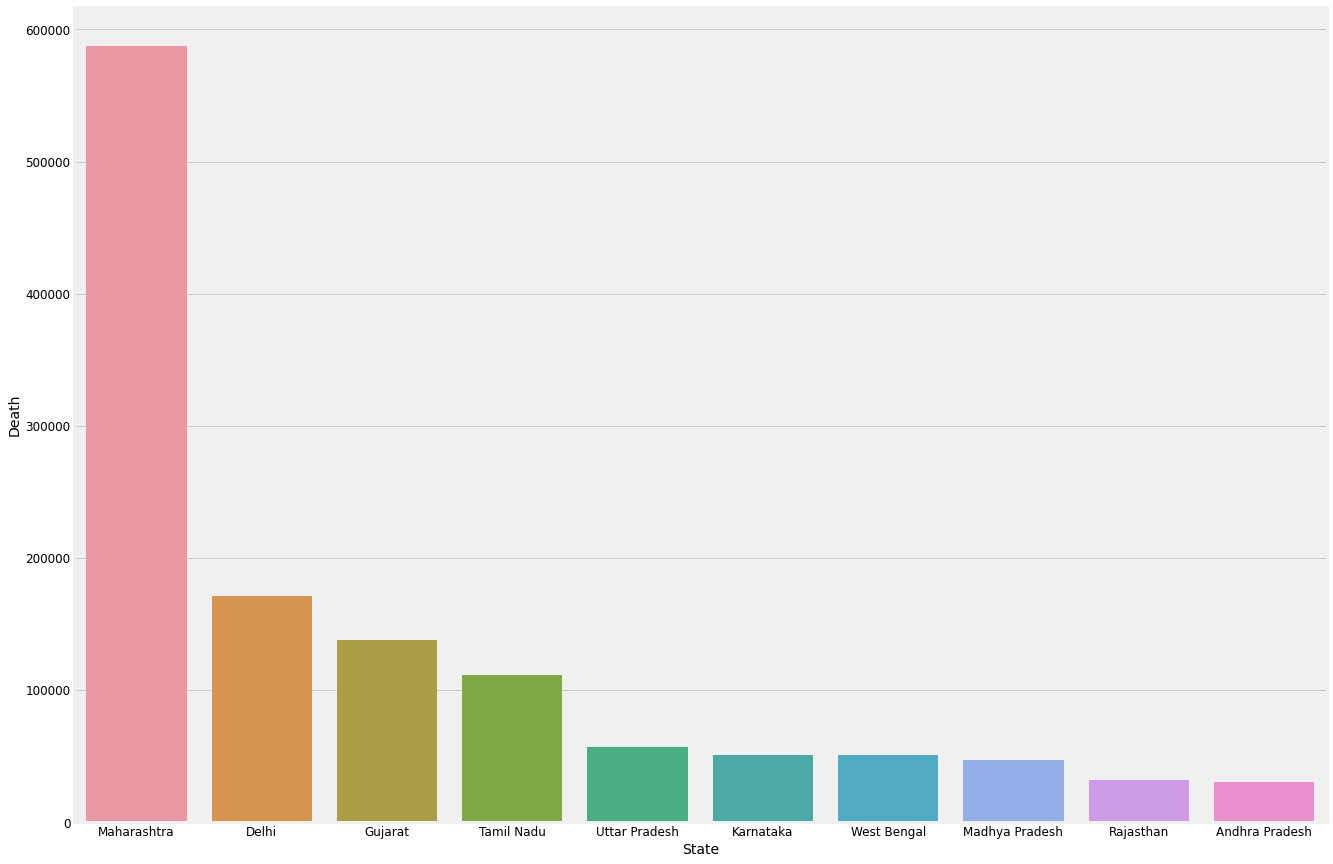

In [ ]:
plt.figure(figsize=(20,15))
statewisedata=complete.groupby('State').sum()
statewisedata.reset_index(inplace=True)
statewisedata.sort_values(by='Death',inplace=True,ascending=False)
sns.barplot(y='Death',x='State',data=statewisedata.iloc[:10])

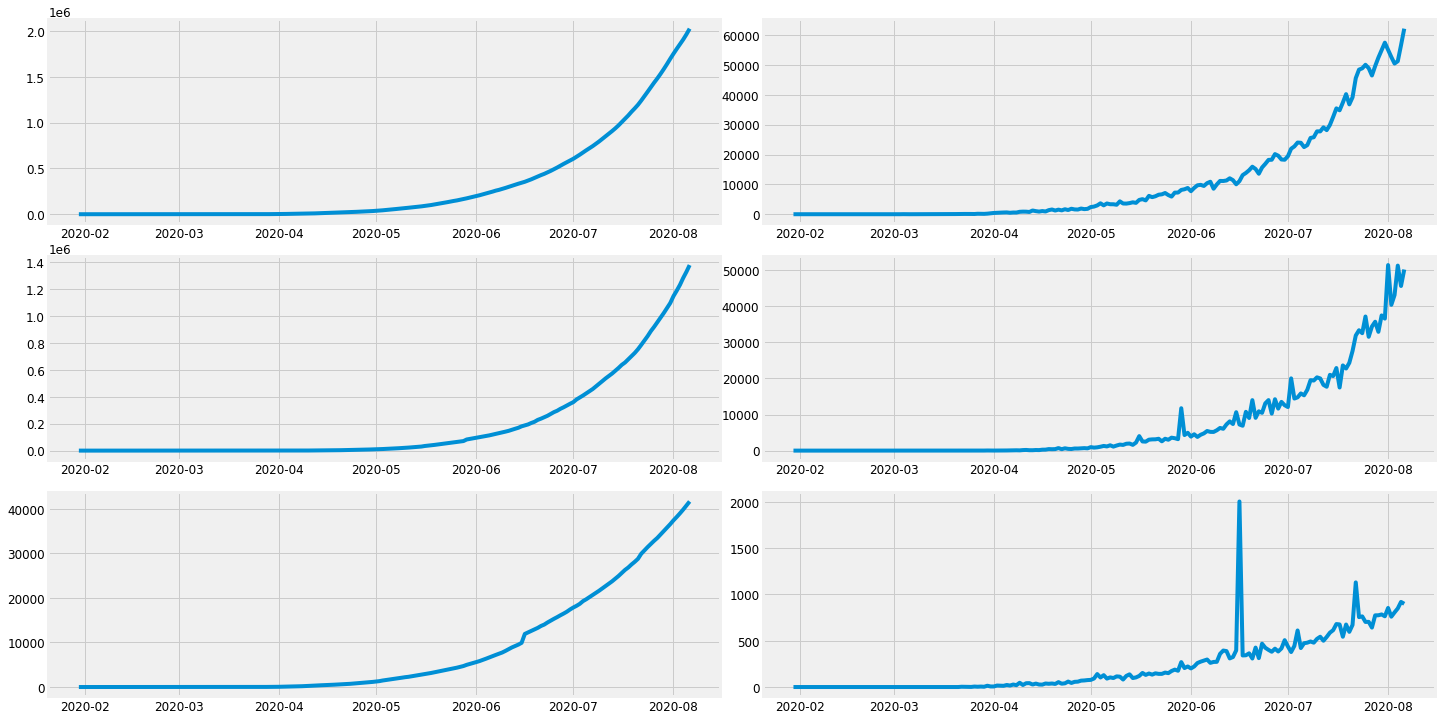

In [ ]:
fig,ax=plt.subplots(3,2,figsize=(20,10))
fig.tight_layout()
ax[0,0].plot(indiadaily['Date'],indiadaily['cases'])
ax[0,1].plot(indiadaily['Date'],indiadaily['casesdaily'])
ax[1,0].plot(indiadaily['Date'],indiadaily['recovery'])
ax[1,1].plot(indiadaily['Date'],indiadaily['recoverydaily'])
ax[2,0].plot(indiadaily['Date'],indiadaily['death'])
ax[2,1].plot(indiadaily['Date'],indiadaily['deathdaily'])

# plt.plot(indiadaily['Date'],indiadaily['Total Recovered'])
# plt.plot(indiadaily['Date'],indiadaily['Total Deceased'])

In [ ]:
indiatesting=pd.read_csv('https://raw.githubusercontent.com/Ashwin1999/COVID-19-Data-Mining/Arnab/COVID-DataTimeSeries(India)/tests_day_wise.csv')
indiatesting=indiatesting[['Tested As Of','Total Samples Tested']]
indiatesting['Tested As Of']=indiatesting['Tested As Of'].str.replace('/','-')
indiatesting.rename(columns={'Tested As Of':'Date','Total Samples Tested':'tests'},inplace=True)
indiatesting.dropna(how='any',axis=0,inplace=True)
indiatesting['Date']= indiatesting['Date'].astype(str).apply(lambda x: datetime.datetime.strptime(x,'%d-%m-%Y'))
indiatesting['Date']= pd.to_datetime(indiatesting['Date'])
indiatesting.head()

,Date,tests
0,2020-03-13,6500.0
1,2020-03-18,13125.0
2,2020-03-19,13316.0
3,2020-03-19,14175.0
4,2020-03-20,14376.0


In [ ]:
indiacovidfinal = indiadaily.merge(indiatesting,how='inner',on='Date')

indiacovidfinal = indiacovidfinal[['Date','casesdaily', 'recoverydaily', 'recovery', 'deathdaily','death', 'tests', 'cases']]
indiacovidfinal.tail()

,Date,casesdaily,recoverydaily,recovery,deathdaily,death,tests,cases
141,2020-08-01,55117,51368,1146906,854,37420,19821831.0,1752185
142,2020-08-02,52672,40355,1187261,760,38180,20202858.0,1804857
143,2020-08-03,50488,43070,1230331,806,38986,20864750.0,1855345
144,2020-08-04,51282,51220,1281551,849,39835,21484402.0,1906627
145,2020-08-05,56626,45583,1327134,919,40754,22149351.0,1963253


In [ ]:
indiacovidfinal.columns

Index(['Date', 'casesdaily', 'recoverydaily', 'recovery', 'deathdaily',
       'death', 'tests', 'cases'],
      dtype='object')

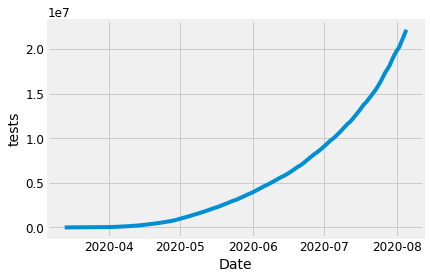

In [ ]:
sns.lineplot(x='Date',y='tests',data=indiacovidfinal)

## EDA



In [ ]:
indiacovidfinal=indiacovidfinal.groupby('Date').sum()
indiacovidfinal.sort_index(inplace= True)
indiacovidfinal.head()

,casesdaily,recoverydaily,recovery,deathdaily,death,tests,cases
Date,,,,,,,
2020-03-13,10,6,10,0,1,6500.0,91
2020-03-18,25,0,15,0,3,13125.0,171
2020-03-19,54,10,40,2,8,27491.0,396
2020-03-20,116,6,46,0,8,29780.0,512
2020-03-21,156,0,46,0,8,32612.0,668


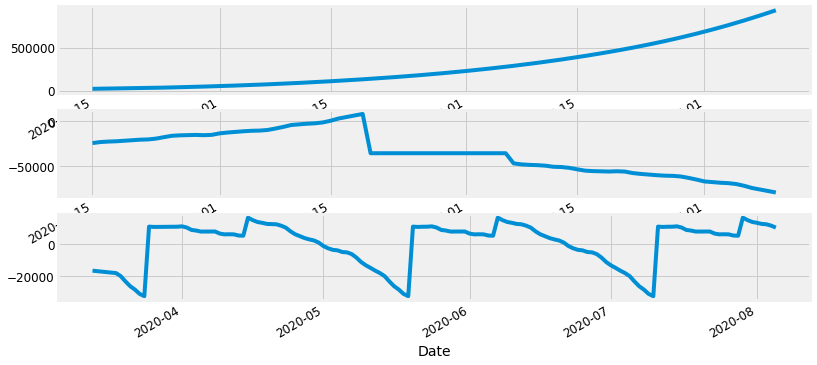

In [ ]:
toplot=indiacovidfinal['cases']
result = seasonal_decompose(toplot, model='additive',freq=52)
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(12,6))
result.trend.plot(ax=ax1)
result.resid.plot(ax=ax2)
result.seasonal.plot(ax=ax3)
plt.show()

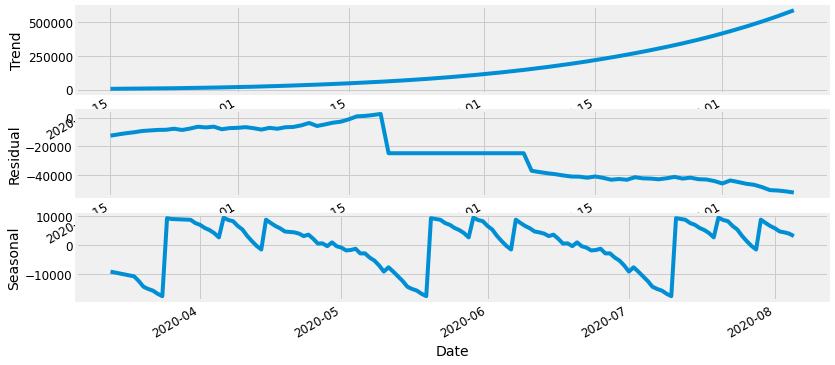

In [ ]:
toplot=indiacovidfinal['recovery']
result = seasonal_decompose(toplot, model='additive',freq=52)
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(12,6))
result.trend.plot(ax=ax1)
result.resid.plot(ax=ax2)
result.seasonal.plot(ax=ax3)
ax1.set_ylabel("Trend")
ax2.set_ylabel("Residual")
ax3.set_ylabel("Seasonal")
plt.show()

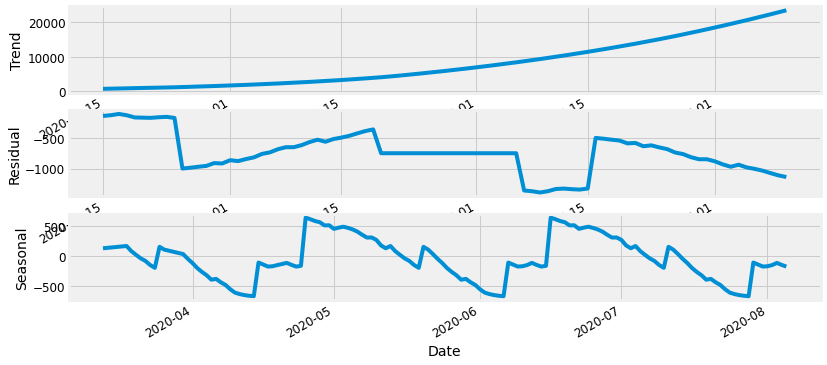

In [ ]:
toplot=indiacovidfinal['death']
result = seasonal_decompose(toplot, model='additive',freq=52)
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(12,6))
result.trend.plot(ax=ax1)
result.resid.plot(ax=ax2)
result.seasonal.plot(ax=ax3)
ax1.set_ylabel("Trend")
ax2.set_ylabel("Residual")
ax3.set_ylabel("Seasonal")
plt.show()

## Stationarity Testing

In [ ]:
result = adfuller(indiacovidfinal['cases'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: 3.495026
p-value: 1.000000
	1%: -3.483
	5%: -2.885
	10%: -2.579


In [ ]:
result = adfuller(indiacovidfinal['death'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: 18.247325
p-value: 1.000000
	1%: -3.479
	5%: -2.883
	10%: -2.578


## LSTM

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(indiacovidfinal)

In [ ]:
# split into train and test sets
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))
print(train.shape)
print(test.shape)

110 28
(110, 7)
(28, 7)


In [ ]:
trainX, trainY = train[:,0:6],train[:,6]
testX, testY = test[:,0:6],test[:,6]

In [ ]:
# trainY = np.insert(trainY, 0, 0)
# define generator
n_input = 1
generator = TimeseriesGenerator(trainX, trainY, length=n_input, batch_size=1)
generator_test = TimeseriesGenerator(testX, testY, length=n_input, batch_size=1)

In [ ]:
n_features = 6
# trainX = trainX.reshape((trainX.shape[0], trainX.shape[1], 1))

In [ ]:
num_epochs=200
lstm_model = Sequential()
lstm_model.add(LSTM(58, activation='relu', input_shape=(n_input, n_features)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse',metrics='mse')
lstm_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 58)                15080     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 59        
Total params: 15,139
Trainable params: 15,139
Non-trainable params: 0
_________________________________________________________________


In [ ]:
lstm_model.fit_generator(generator=generator,epochs=num_epochs,validation_data=generator_test)

Epoch 1/200
109/109 [==============================] - 0s 4ms/step - loss: 0.0088 - mse: 0.0088 - val_loss: 0.1216 - val_mse: 0.1216
Epoch 2/200
109/109 [==============================] - 0s 2ms/step - loss: 0.0018 - mse: 0.0018 - val_loss: 0.0236 - val_mse: 0.0236
Epoch 3/200
109/109 [==============================] - 0s 2ms/step - loss: 2.1688e-04 - mse: 2.1688e-04 - val_loss: 0.0051 - val_mse: 0.0051
Epoch 4/200
109/109 [==============================] - 0s 2ms/step - loss: 9.1832e-05 - mse: 9.1832e-05 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 5/200
109/109 [==============================] - 0s 2ms/step - loss: 5.5592e-05 - mse: 5.5592e-05 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 6/200
109/109 [==============================] - 0s 2ms/step - loss: 4.5676e-05 - mse: 4.5676e-05 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 7/200
109/109 [==============================] - 0s 2ms/step - loss: 3.3842e-05 - mse: 3.3842e-05 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 8/200
109/109 [========

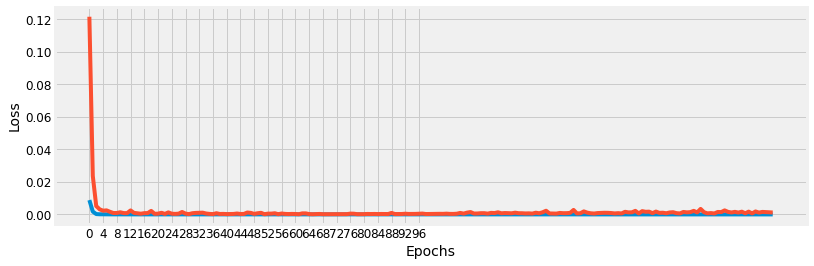

In [ ]:
plt.figure(figsize=(12,4))
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(np.arange(0,100,4))
plt.plot(lstm_model.history.history['loss'], label='train')
plt.plot(lstm_model.history.history['val_loss'], label='test')

In [ ]:
output=lstm_model.predict(generator_test)

In [ ]:
toInverseScaleOuput = np.hstack((testX[0:len(testX)-1],output))
inverseScaledOutput=scaler.inverse_transform(toInverseScaleOuput)

inverseScaledActual=scaler.inverse_transform(test[0:len(test)-1])

In [ ]:
inverseScaledActual[:,-1:],inverseScaledOutput[:,-1:]

(array([[ 794847.],
        [ 822609.],
        [ 850366.],
        [ 879472.],
        [ 907650.],
        [ 937567.],
        [ 970174.],
        [1005642.],
        [1040462.],
        [1077873.],
        [1118108.],
        [1154914.],
        [1194084.],
        [1239685.],
        [1288128.],
        [1337016.],
        [1387088.],
        [1436020.],
        [1482504.],
        [1532135.],
        [1584614.],
        [1639582.],
        [1697068.],
        [1752185.],
        [1804857.],
        [1855345.],
        [1906627.]]), array([[ 821477.43383175],
        [ 853785.11554271],
        [ 880549.86427003],
        [ 900525.36844081],
        [ 921926.56599289],
        [ 964055.95752823],
        [ 998457.24609888],
        [1043145.19792879],
        [1057311.32920873],
        [1110406.82331872],
        [1147005.27576172],
        [1176443.43360615],
        [1230249.66816247],
        [1310677.66085911],
        [1361035.50540006],
        [1408118.84209609],
        [14

In [ ]:
rms = sqrt(mean_squared_error(inverseScaledActual[:,-1:],inverseScaledOutput[:,-1:]))
print('RMSE : ',rms)

RMSE :  101467.51772324063


In [ ]:
mae = mean_absolute_error(inverseScaledActual[:,-1:],inverseScaledOutput[:,-1:])
print('MAE :' ,mae)

MAE : 78168.8615985822


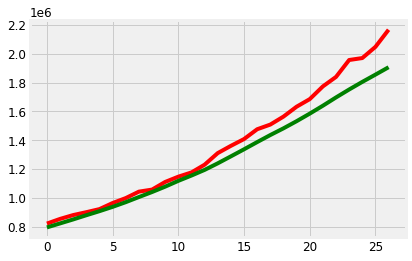

In [ ]:
plt.plot(inverseScaledOutput[:,-1:],'r')
plt.plot(inverseScaledActual[:,-1:],'g')
plt.show()


In [ ]:
r2score=r2_score(inverseScaledActual[:,-1:],inverseScaledOutput[:,-1:])
print('R2 Score: ',r2score )

R2 Score:  0.9111030003284643
